# Power Production 1985-2018 and Future Forecasts 

In [1]:
library(tidyverse)
library(dygraphs)
library(timeSeries)
library(forecast)
library(lubridate)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.1     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'dygraphs' was built under R version 4.0.2"
Loading required package: timeDate

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [2]:
power_data = read.csv(file.choose(), header = TRUE, sep = ',', stringsAsFactors = FALSE, row.names="DATE")

In [3]:
str(power_data)

'data.frame':	397 obs. of  1 variable:
 $ IPG2211A2N: num  72.5 70.7 62.5 57.5 55.3 ...


In [4]:
head(power_data)

,IPG2211A2N
,<dbl>
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904


In [5]:
tail(power_data)

,IPG2211A2N
,<dbl>
8/1/2017,108.9312
9/1/2017,98.6154
10/1/2017,93.6137
11/1/2017,97.3359
12/1/2017,114.7212
1/1/2018,129.4048


In [6]:
power_data = power_data %>%
  rename(Power_GW = IPG2211A2N)

In [7]:
str(power_data)

'data.frame':	397 obs. of  1 variable:
 $ Power_GW: num  72.5 70.7 62.5 57.5 55.3 ...


In [8]:
summary(power_data)

    Power_GW     
 Min.   : 55.32  
 1st Qu.: 77.11  
 Median : 89.78  
 Mean   : 88.85  
 3rd Qu.:100.52  
 Max.   :129.40  

In [10]:
by_month = ts(power_data[,1], start = c(1985, 1), end = c(2018, 1), frequency = 12)

In [11]:
by_month

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1985,72.5052,70.6720,62.4502,57.4714,55.3151,58.0904,62.6202,63.2485,60.5846,56.3154,58.0005,68.7145
1986,73.3057,67.9869,62.2221,57.0329,55.8137,59.9005,65.7655,64.4816,61.0005,57.5322,59.3417,68.1354
1987,73.8152,70.0620,65.6100,60.1586,58.8734,63.8918,68.8694,70.0669,64.1151,60.3789,62.4643,70.5777
1988,79.8703,76.1622,70.2928,63.2384,61.4065,67.1097,72.9816,75.7655,67.5152,63.2832,65.1078,73.8631
1989,77.9188,76.6822,73.3523,65.1081,63.6892,68.4722,74.0301,75.0448,69.3053,65.8735,69.0706,84.1949
1990,84.3598,77.1726,73.1964,67.2781,65.8218,71.4654,76.6140,77.1052,73.0610,67.4365,68.5665,77.6839
1991,86.0214,77.5573,73.3650,67.1500,68.8162,74.8448,80.0928,79.1606,73.5743,68.7538,72.5166,79.4894
1992,85.2855,80.1643,74.5275,69.6441,67.1784,71.2078,77.5081,76.5374,72.3541,69.0286,73.4992,84.5159
1993,87.9464,84.5561,79.4747,71.0578,67.6762,74.3297,82.1048,82.0605,74.6031,69.6810,74.4292,84.2284
1994,94.1386,87.1607,79.2456,70.9749,69.3844,77.9831,83.2770,81.8872,75.6826,71.2661,75.2458,84.8147


Time-series plot

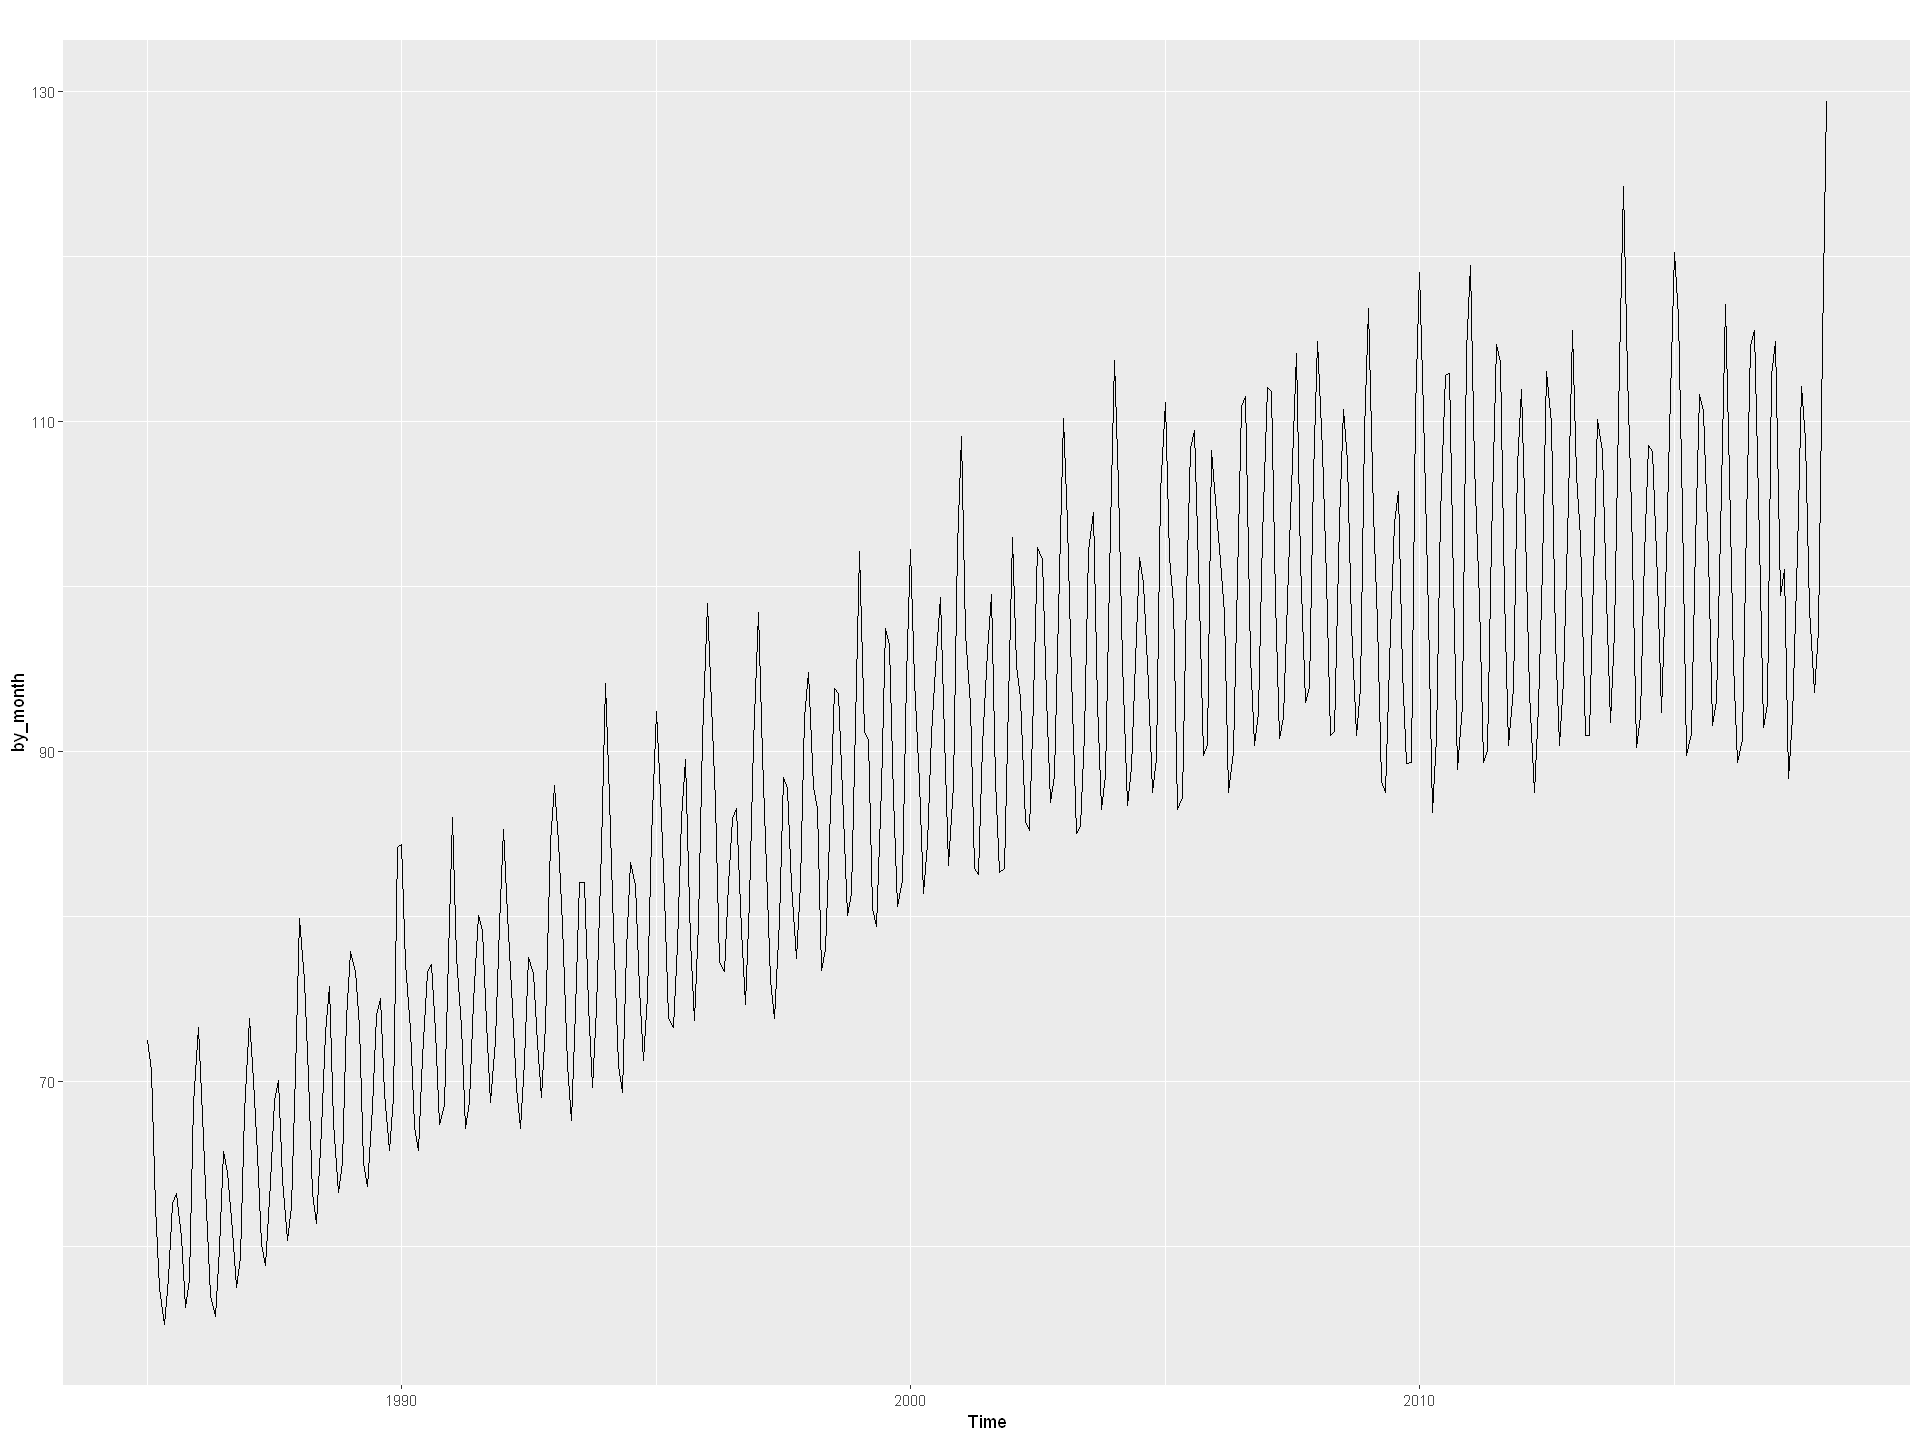

In [13]:
options(repr.plot.width = 16, repr.plot.height = 12)
autoplot(by_month)

Lag plot of the time series

Interactive plot (Zoom in from the slider)

In [14]:
dygraph(by_month, main = "Power Production: 1985-2018") %>%
  dyAxis("y", label = "GW") %>%
  dyOptions(axisLineWidth = 1.5, fillGraph = FALSE, drawGrid = FALSE) %>%
  dyRangeSelector(height = 25)

HTML widgets cannot be represented in plain text (need html)

Monthly Lag Plots

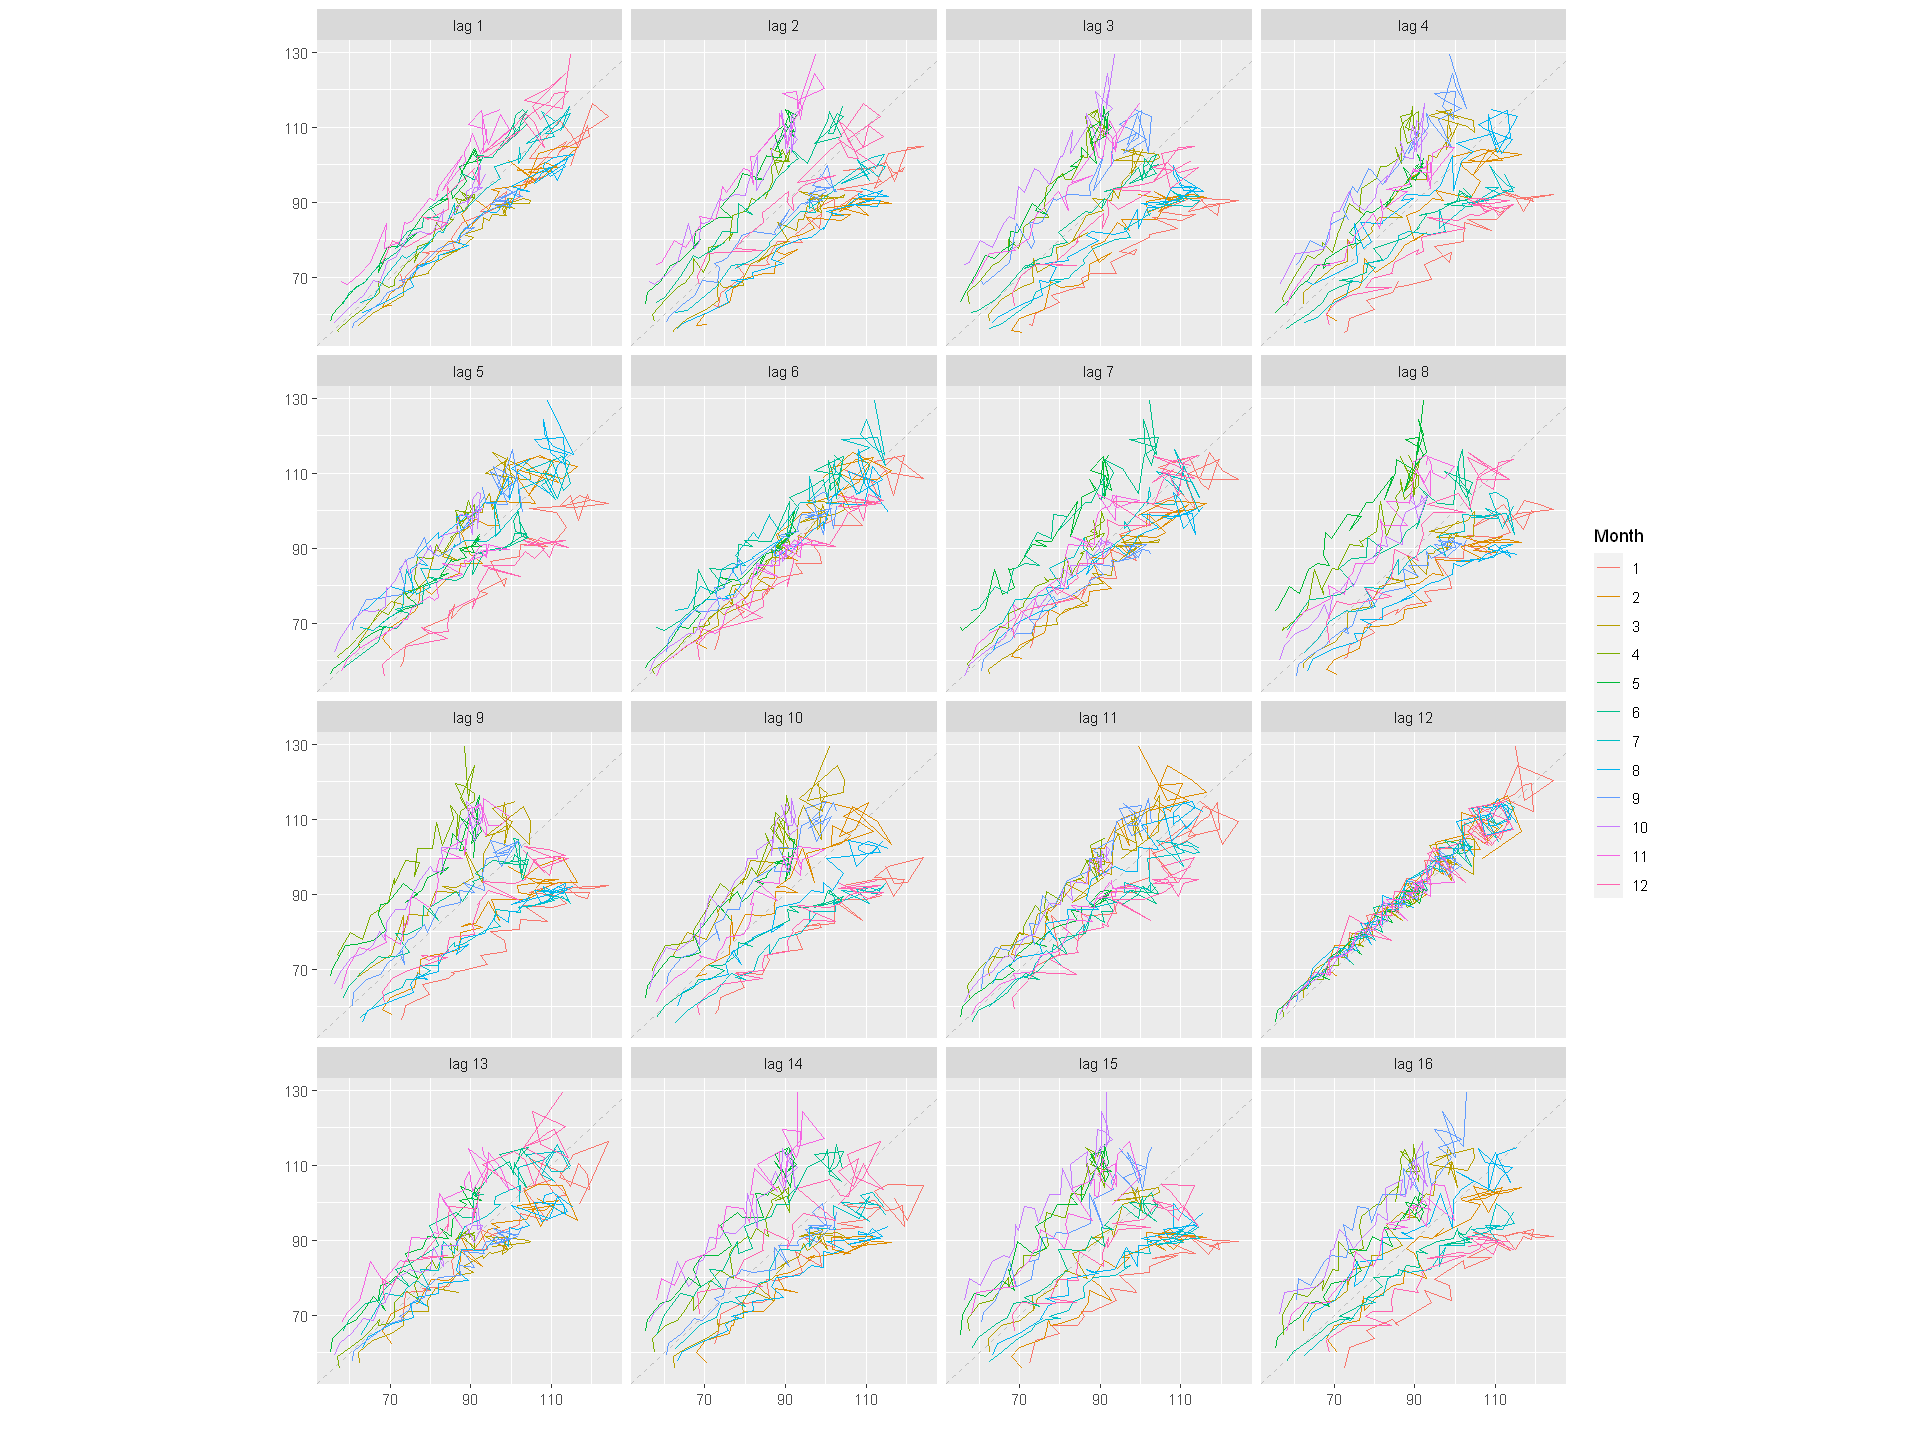

In [15]:
gglagplot(by_month)

We can see that there is a positive linear trend, which suggests a positive autocorrelation <br>
At lag 12 the data seem to be almost perfenctly autocorrelated 

Seasonal Plots of power Production

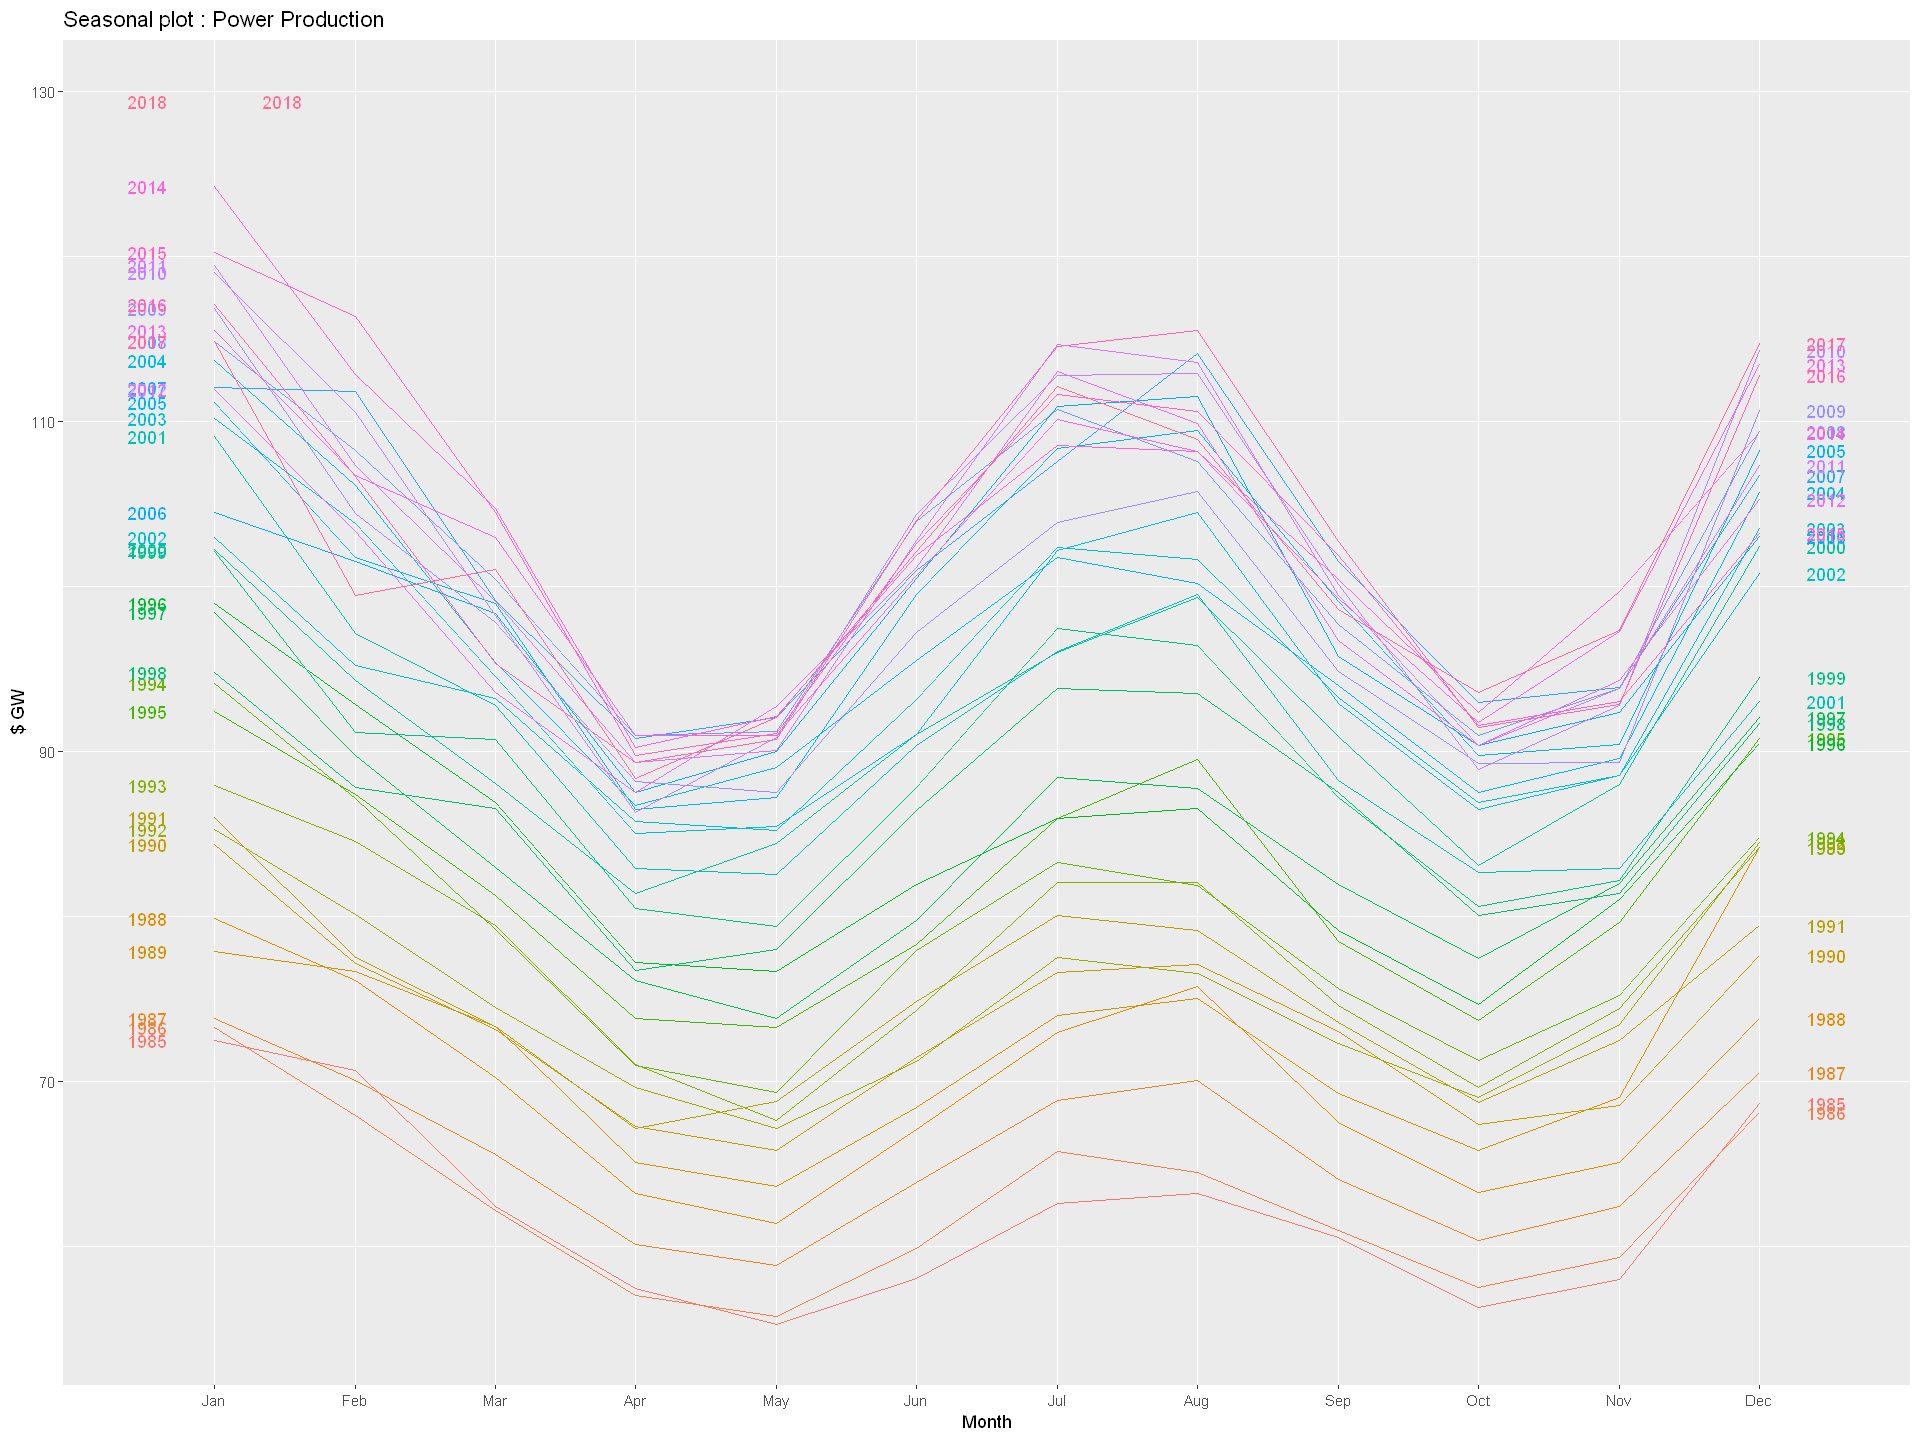

In [16]:
ggseasonplot(by_month, year.labels = TRUE, year.labels.left = TRUE) +
  ylab('$ GW') +
  ggtitle('Seasonal plot : Power Production')

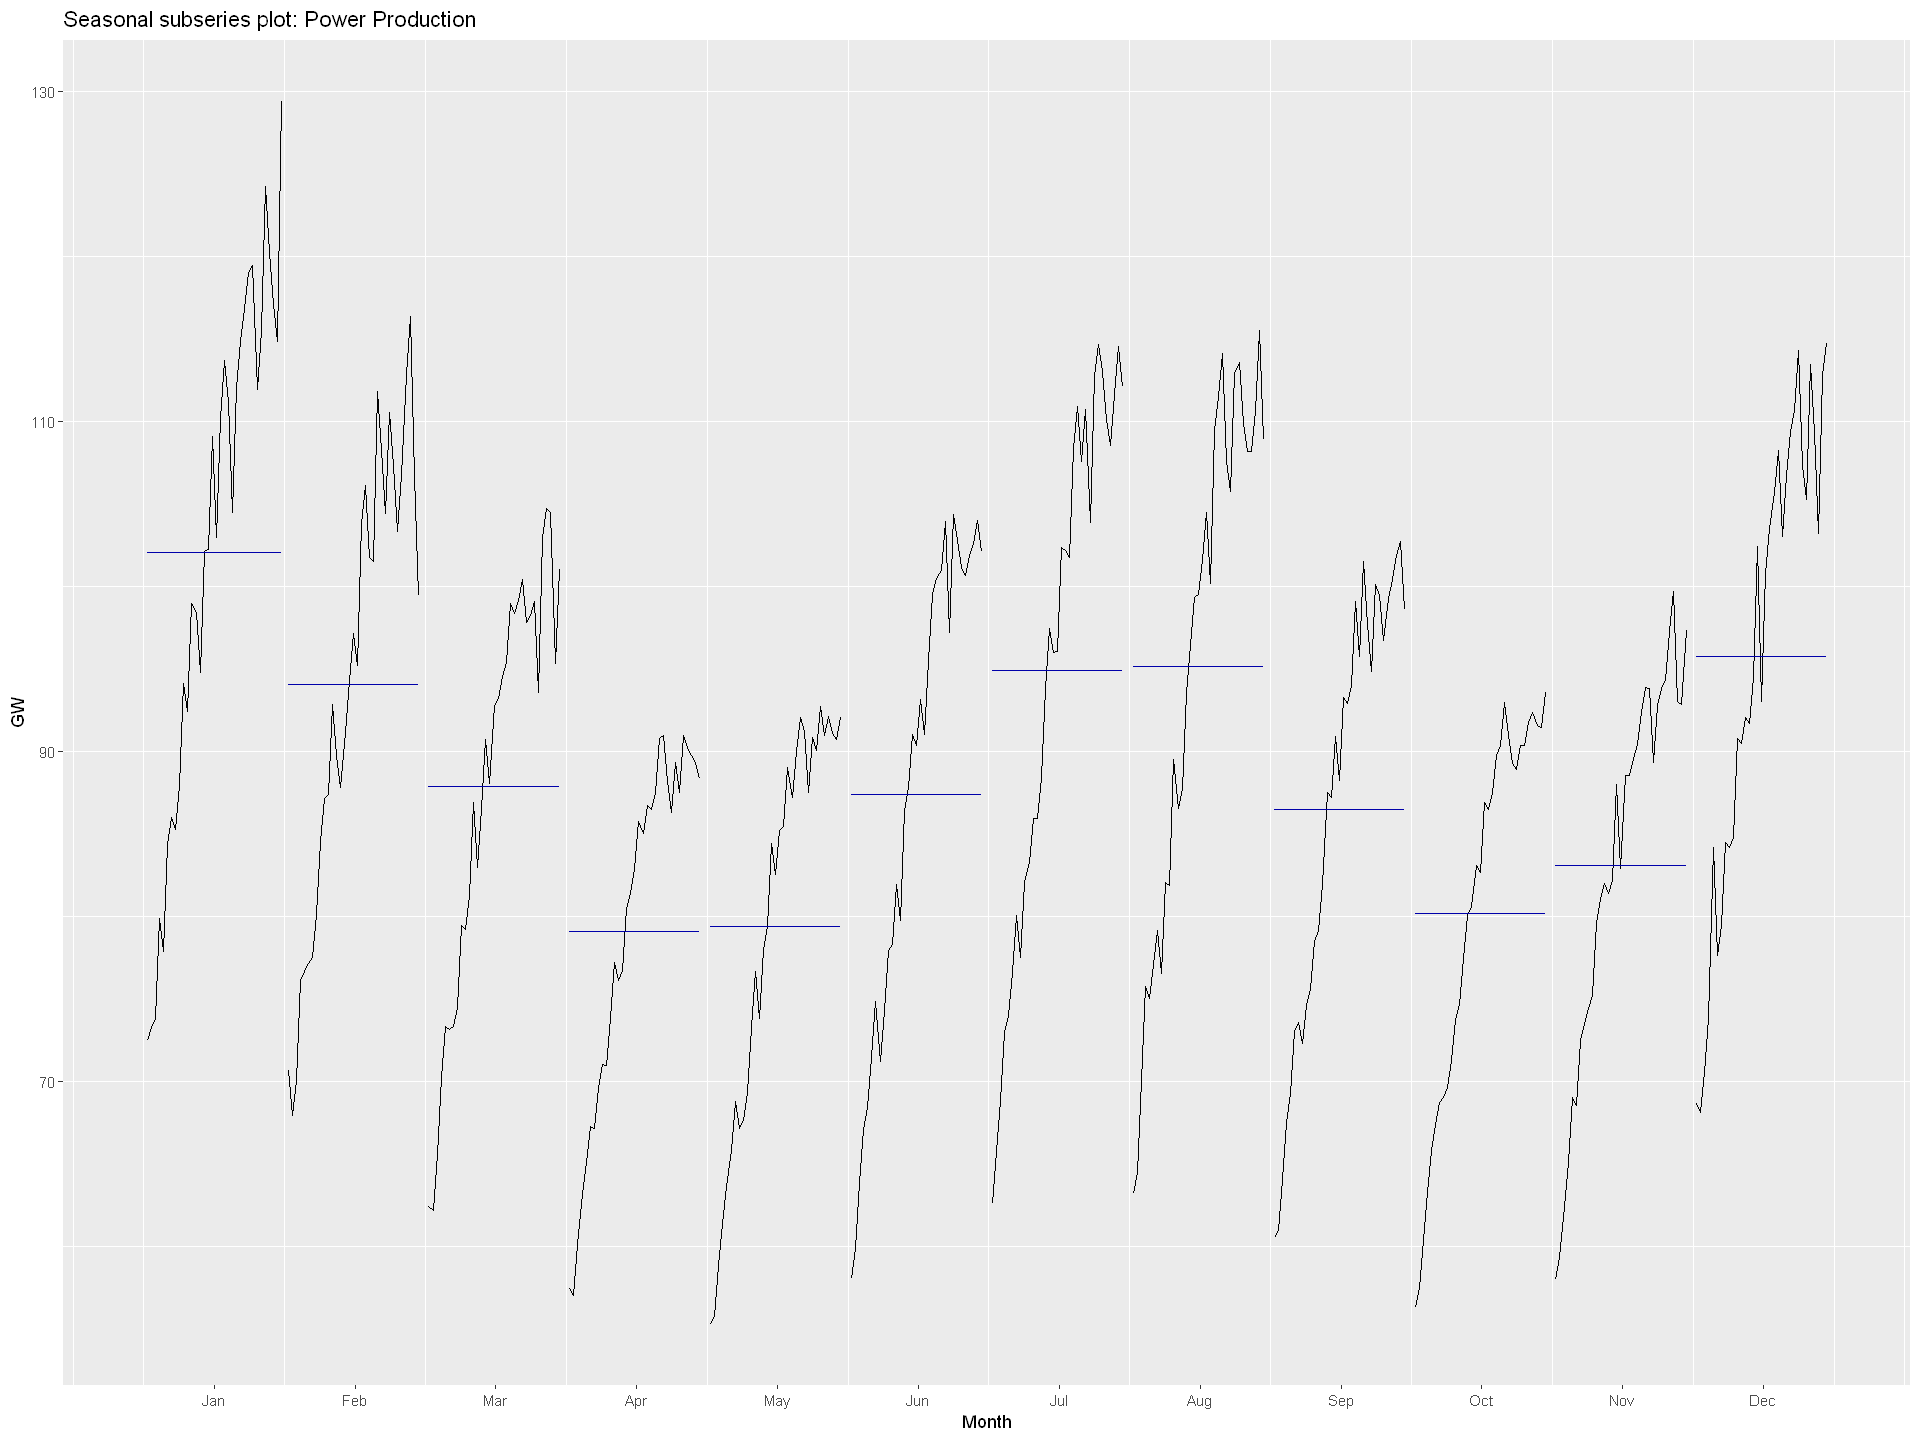

In [17]:
ggsubseriesplot(by_month) +
  ylab('GW') +
  ggtitle('Seasonal subseries plot: Power Production')

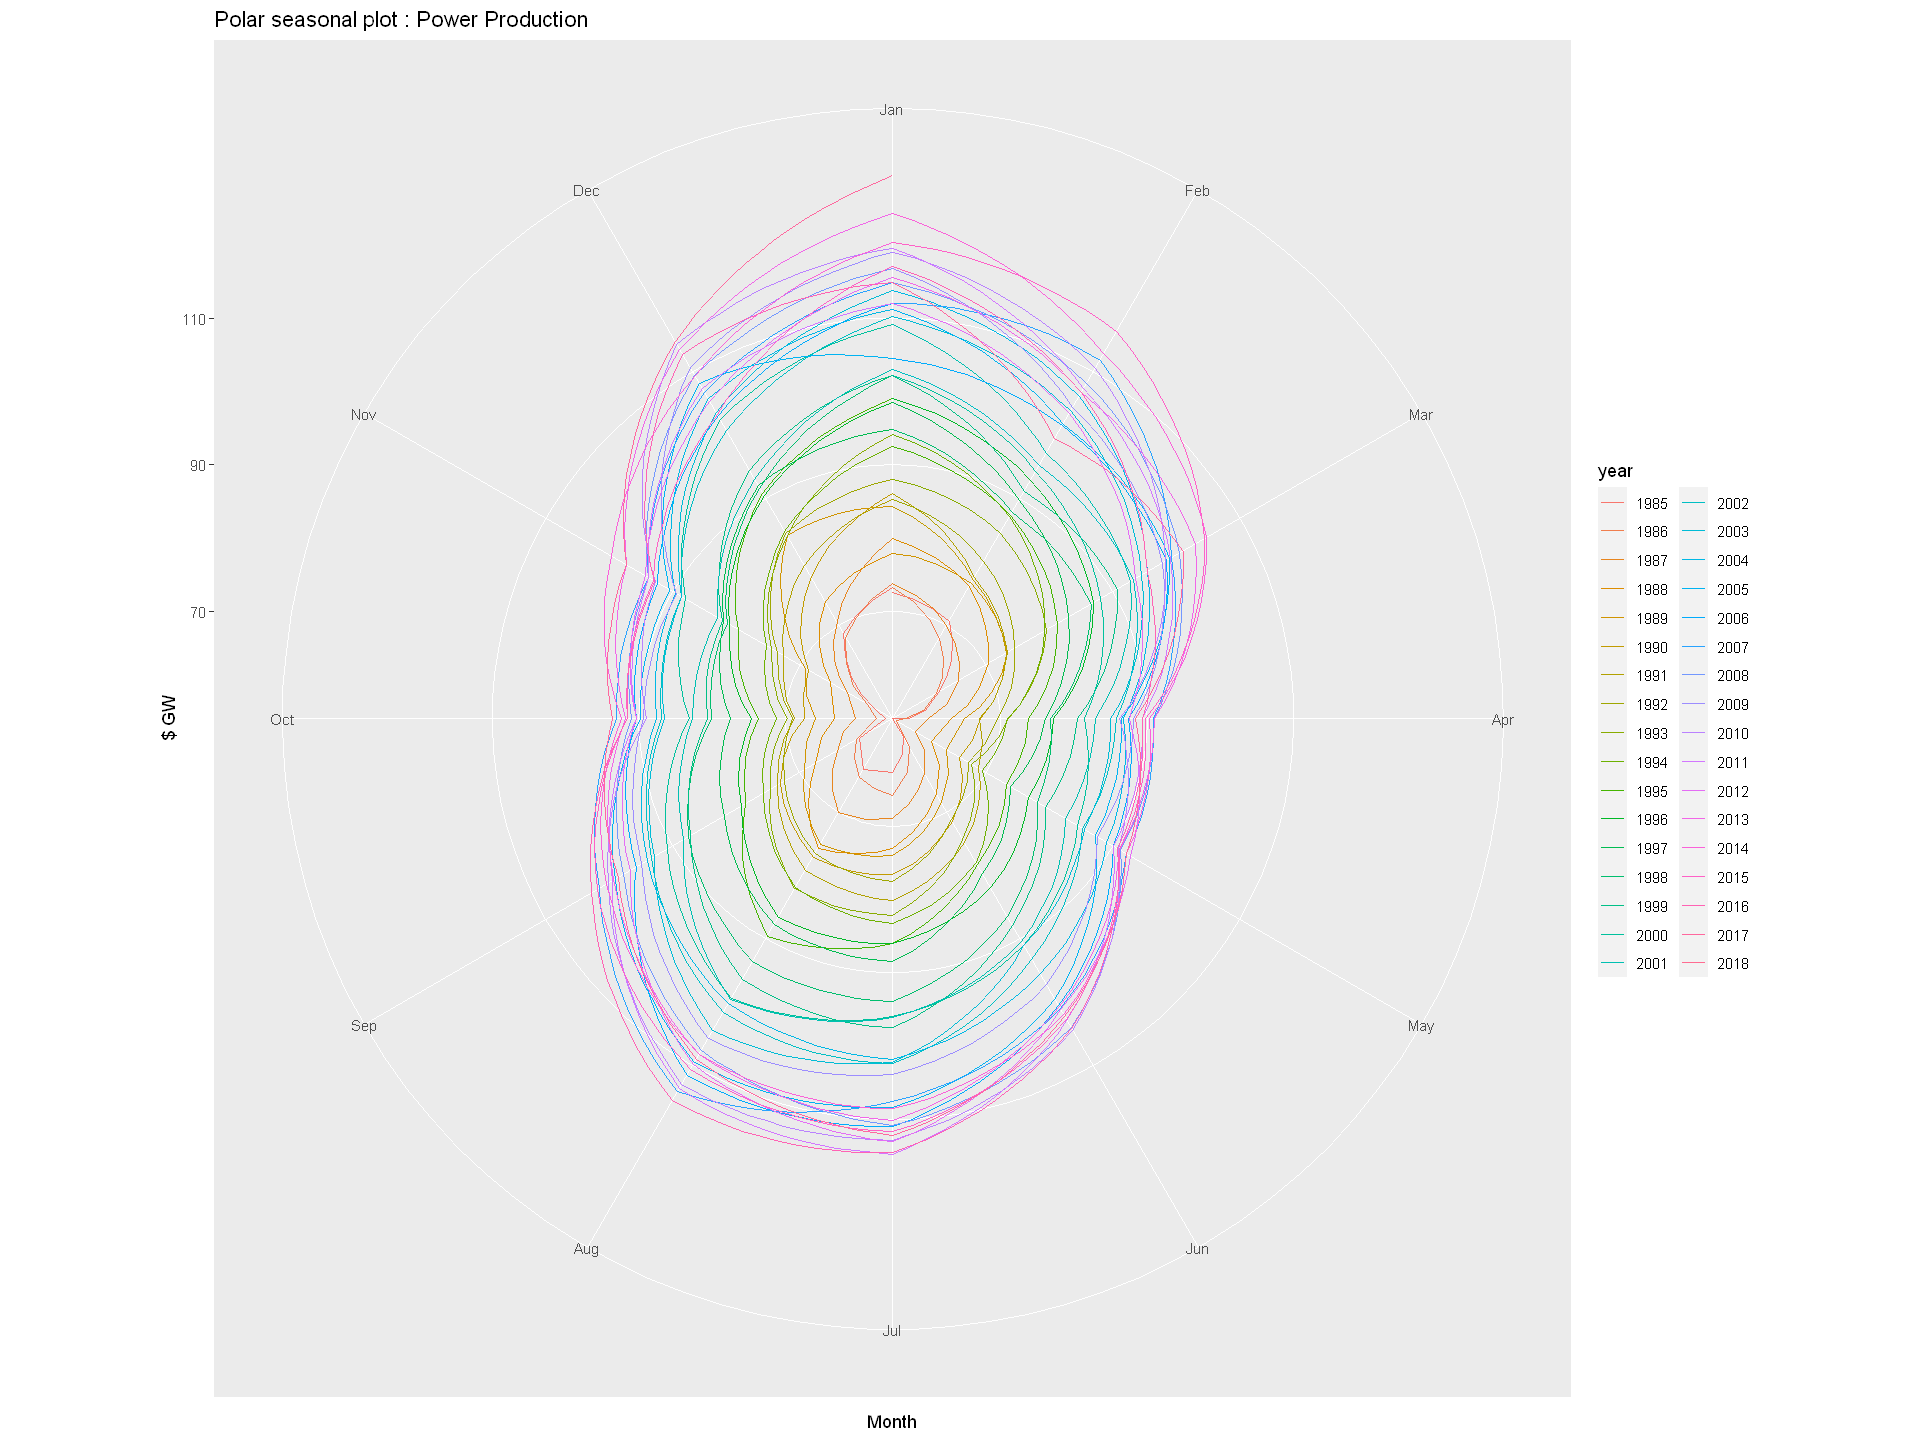

In [18]:
ggseasonplot(by_month, polar = TRUE) + 
  ylab('$ GW') +
  ggtitle('Polar seasonal plot : Power Production')

 Auto Correlation Function (ACF) Plot 

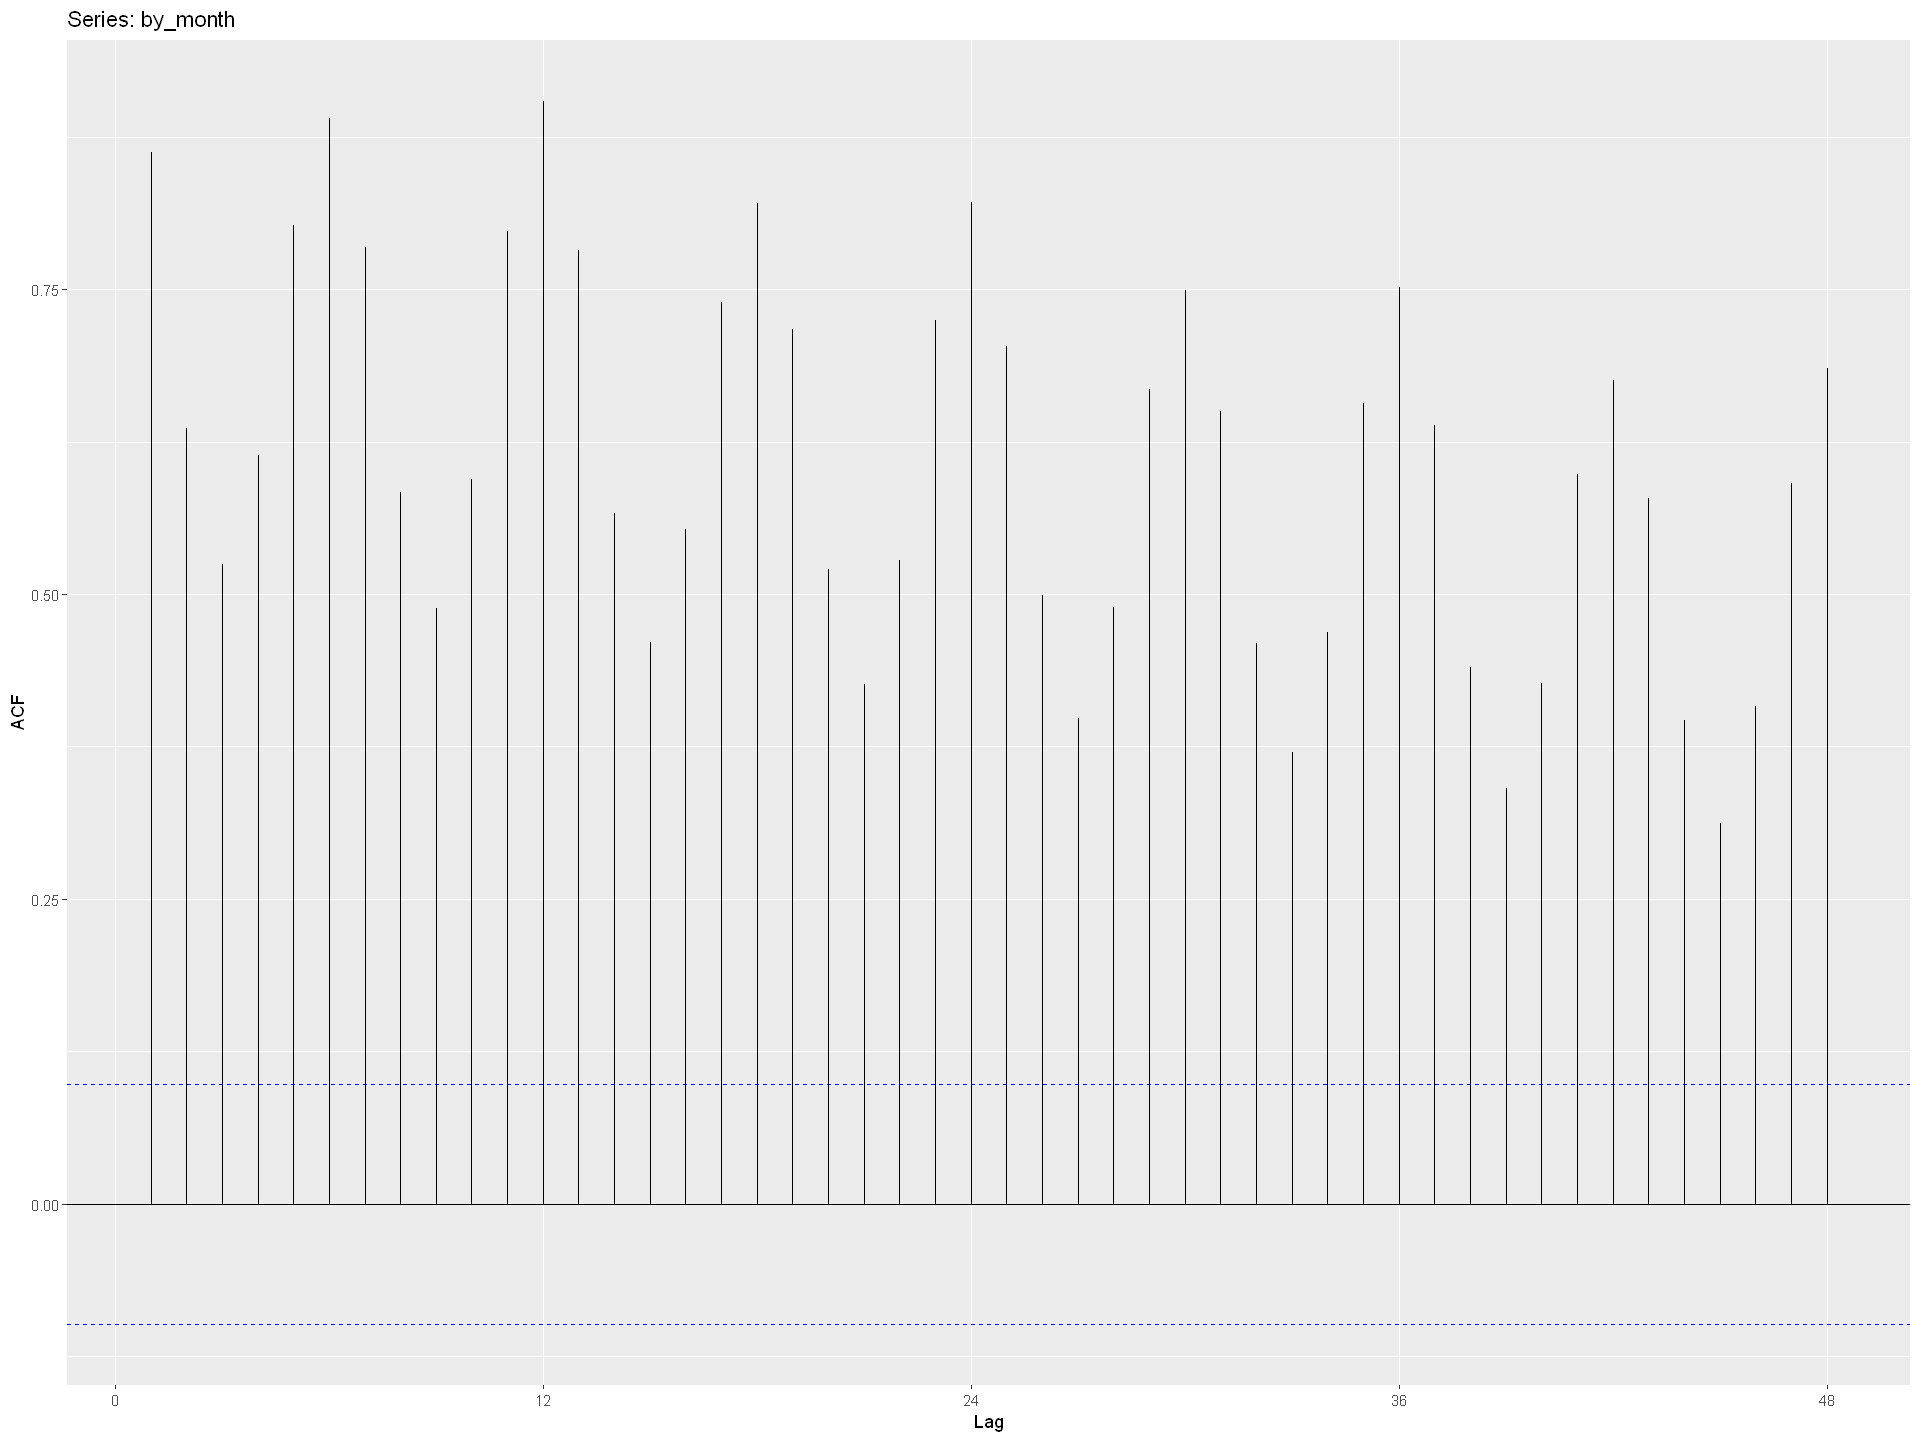

In [19]:
ggAcf(by_month,lag=48)

Autocorrelation measures the linear relationship between lagged
values of a time series.<br>
The slow decrease in the ACF as the lags increase is due to the trend, while the
“scalloped” shape is due the seasonality

Forecast using the **Average Method**

In [20]:
mean_fc = meanf(window(by_month,start=2005,end=c(2017,6)), h=12)

Forecasts of all future values are equal to the average of
the historical data

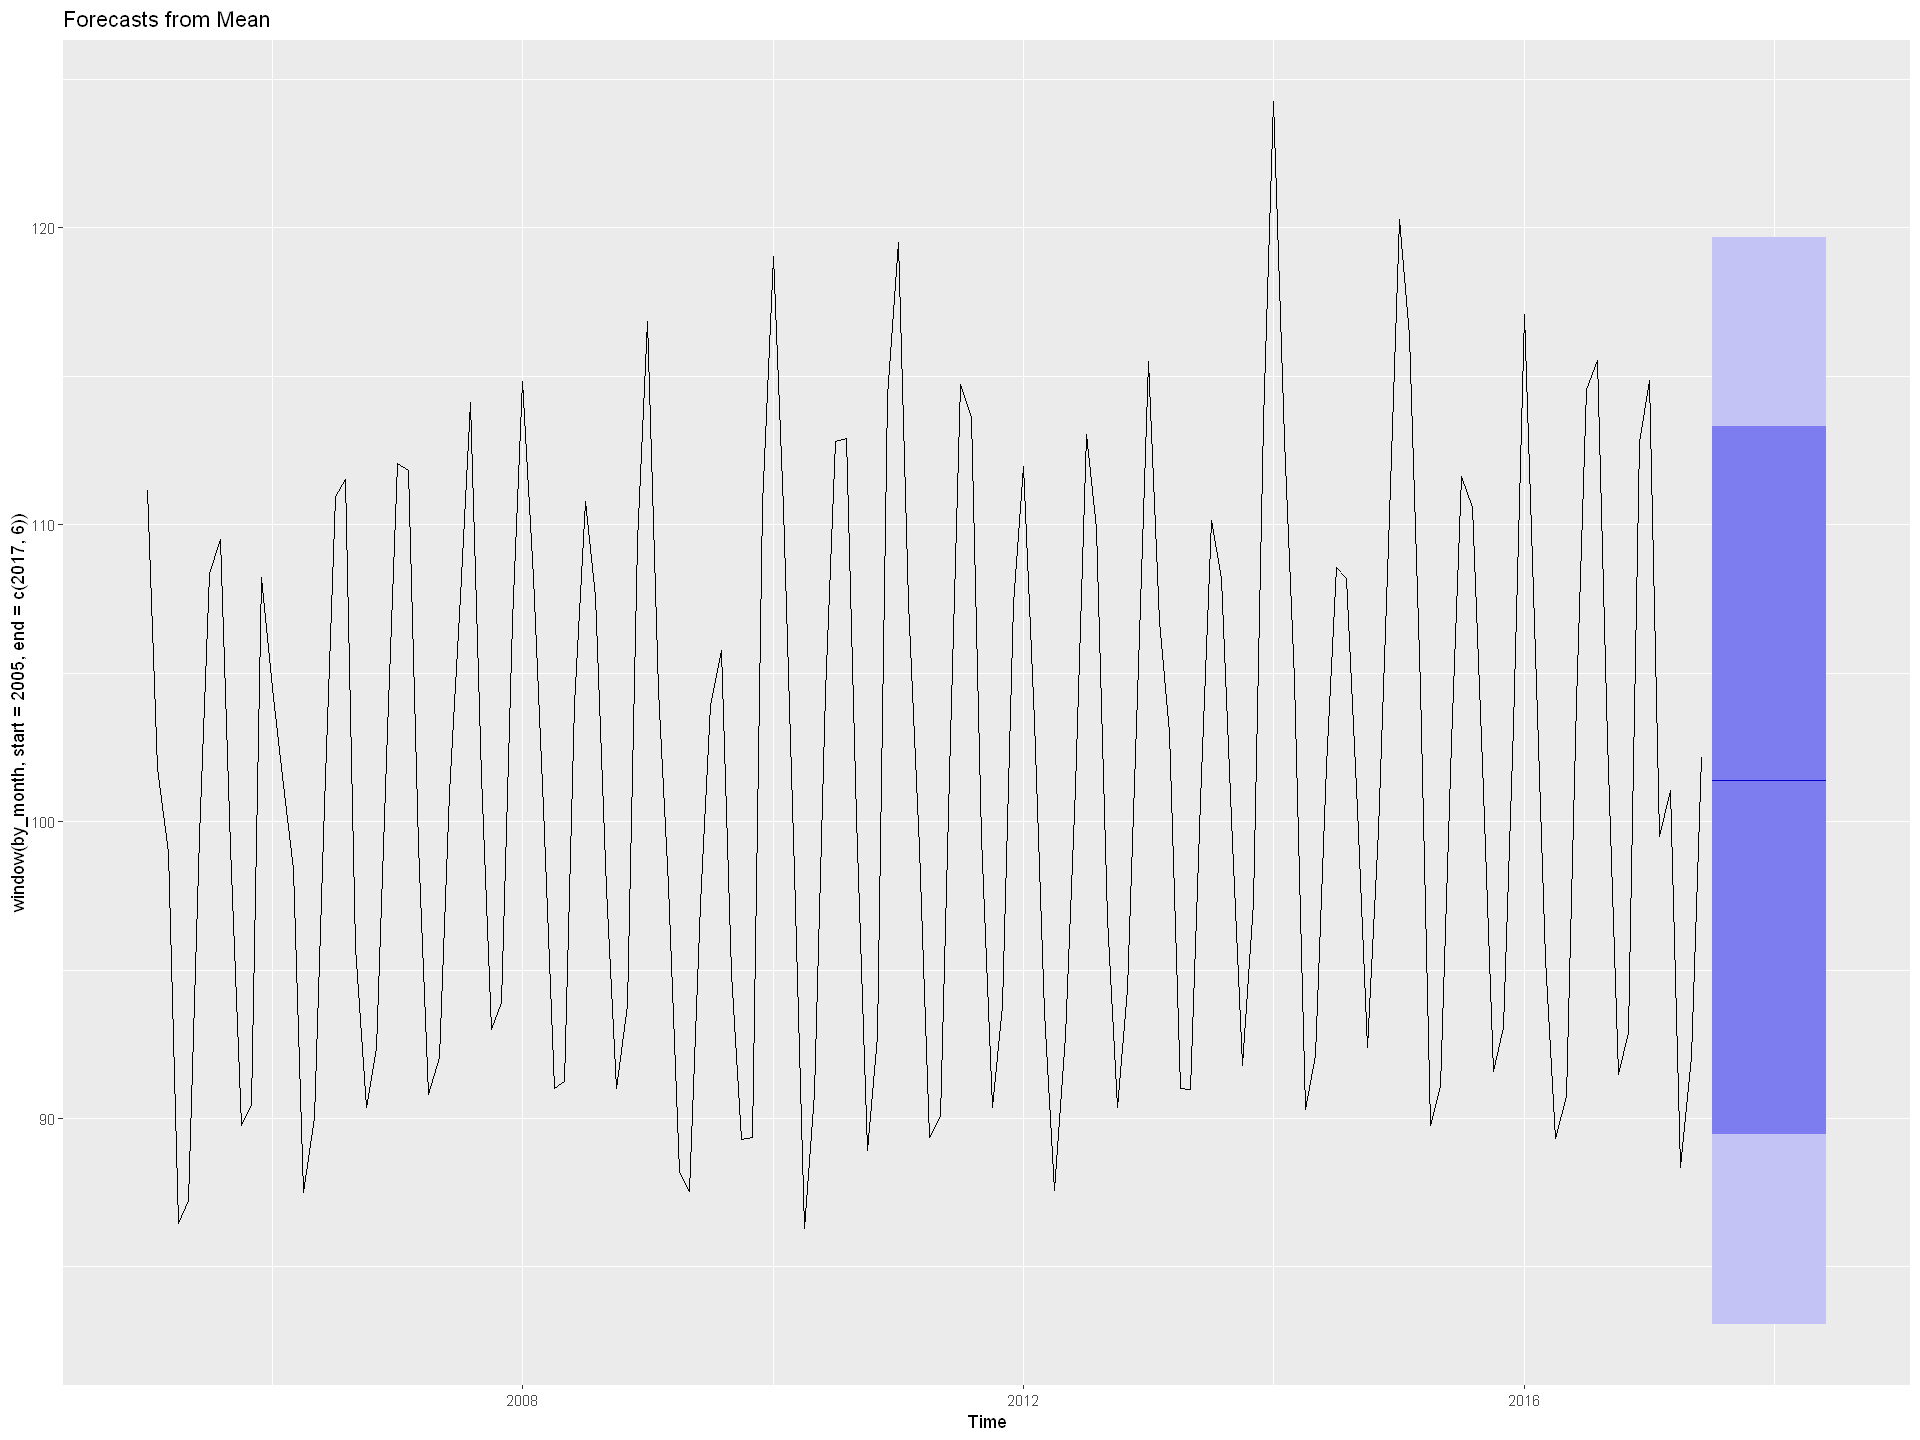

In [21]:
autoplot(mean_fc)

 **Residual diagnostics**


	Ljung-Box test

data:  Residuals from Mean
Q* = 1194.4, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



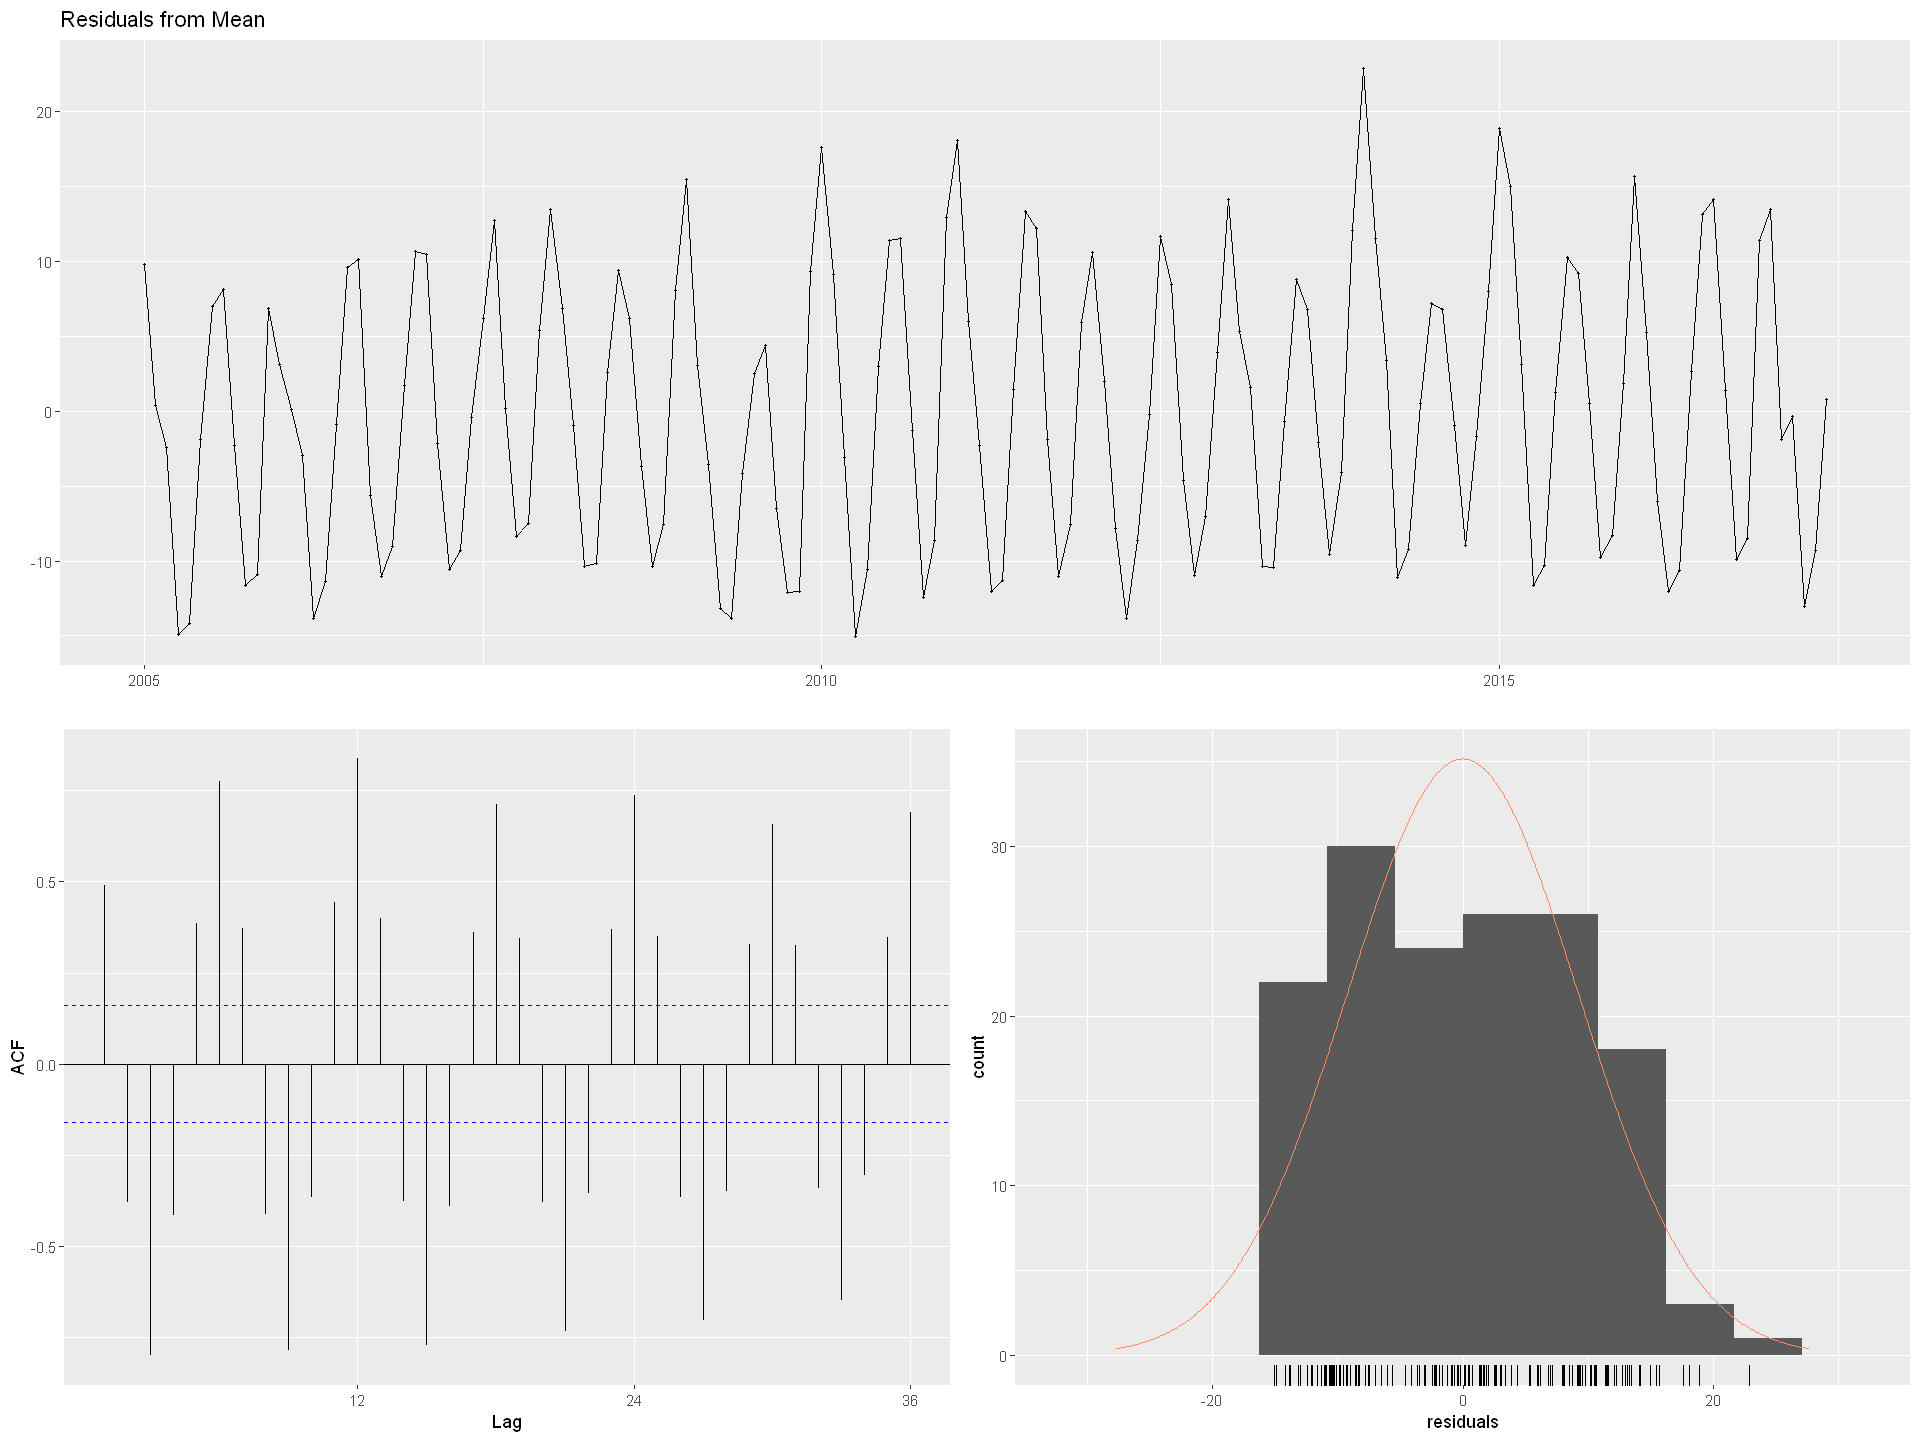

In [25]:
checkresiduals(mean_fc)

**Accuracy**

In [27]:
accuracy(mean_fc, window(by_month,start=2005))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.021475e-15,9.202206,7.870818,-0.8225063,7.817562,2.631244,0.4894141,NA
Test set,6.451963e+00,13.209311,10.610403,4.9449615,9.297279,3.547098,0.3774515,1.21418


**Naive Forecasting Method**

In [28]:
naive_fc = naive(window(by_month,start=2005,end=c(2017,6)), h=12)

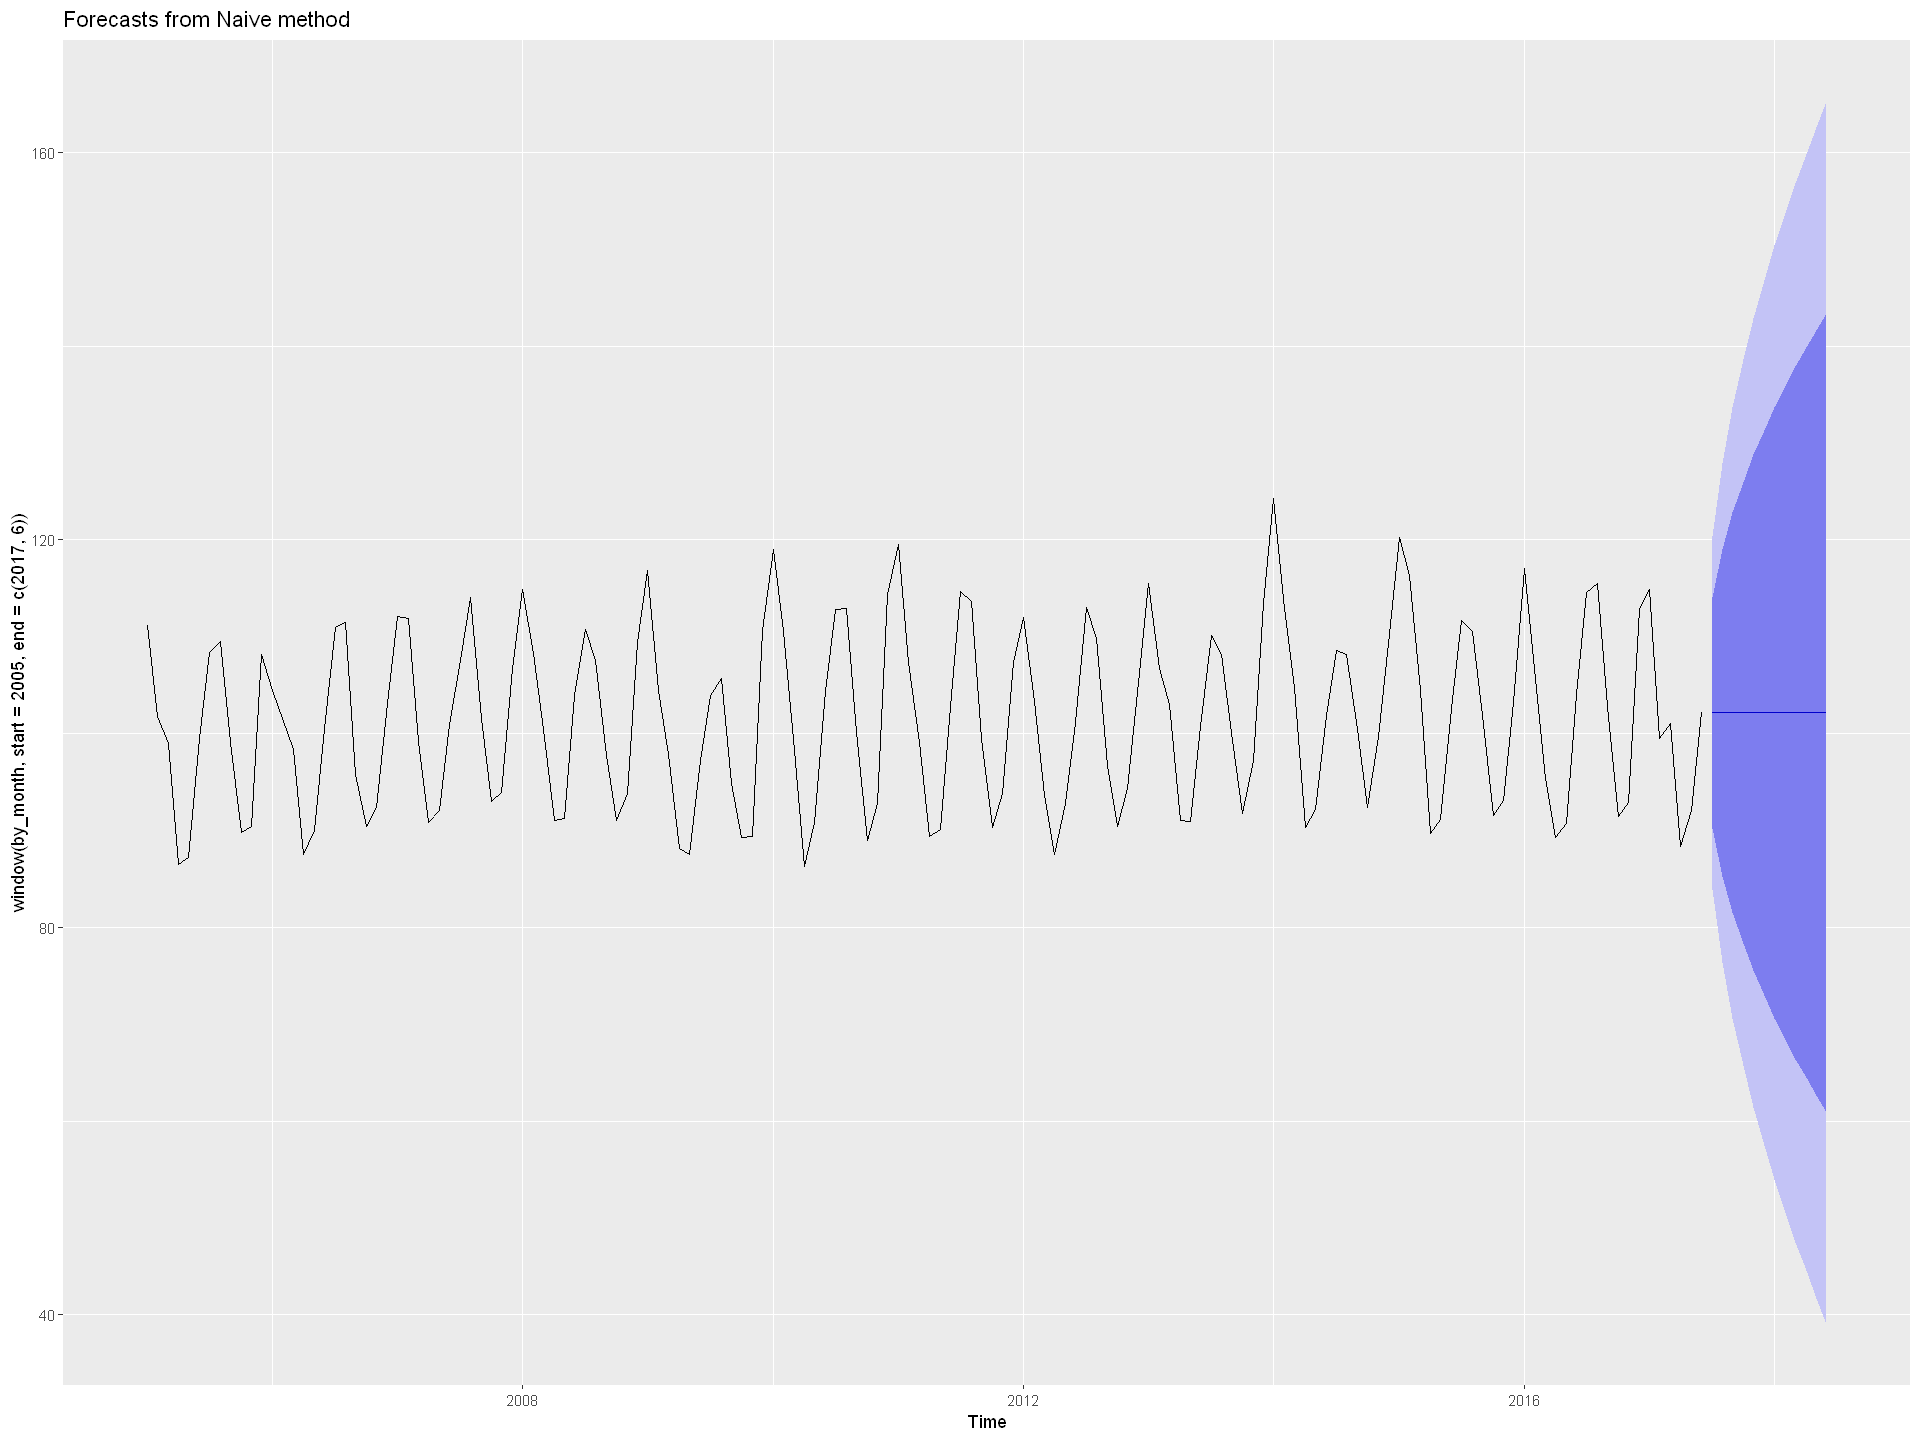

In [29]:
autoplot(naive_fc)

 **Residual diagnostics**


	Ljung-Box test

data:  Residuals from Naive method
Q* = 1139.9, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



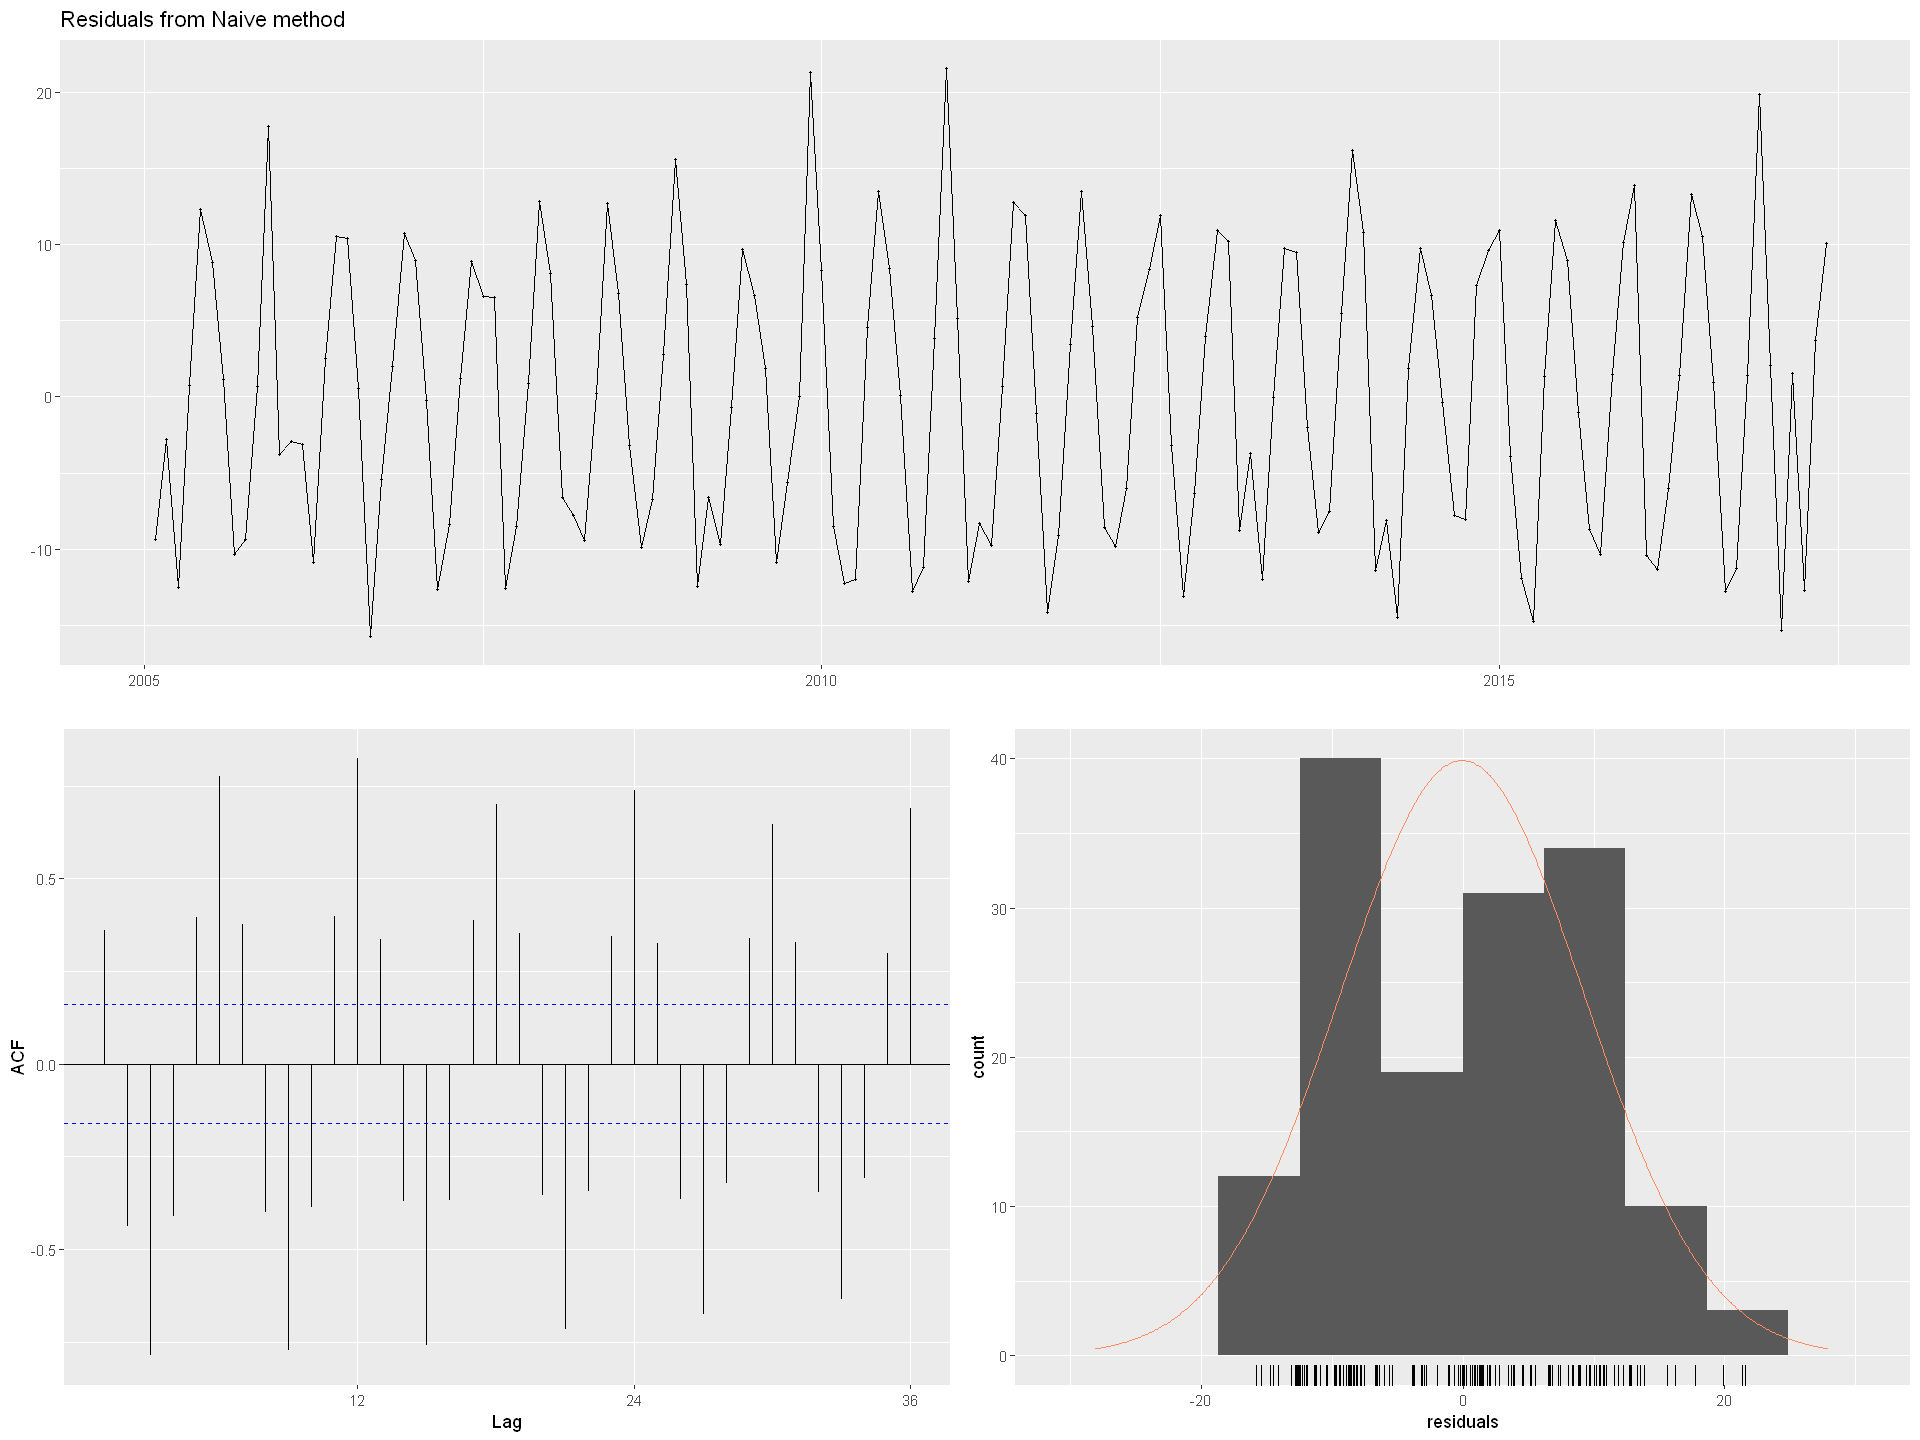

In [30]:
checkresiduals(naive_fc)

**Accuracy**

In [31]:
accuracy(naive_fc, window(by_month,start=2005))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.06045772,9.295519,7.988238,-0.4745778,7.875268,2.670498,0.3598590,NA
Test set,5.67194286,12.846362,10.498971,4.2135567,9.258895,3.509846,0.3774515,1.188837


**Seasonal Naive Forecasting Method**

In [32]:
snaive_fc = snaive(window(by_month,start=2005,end=c(2017,6)), h=12)

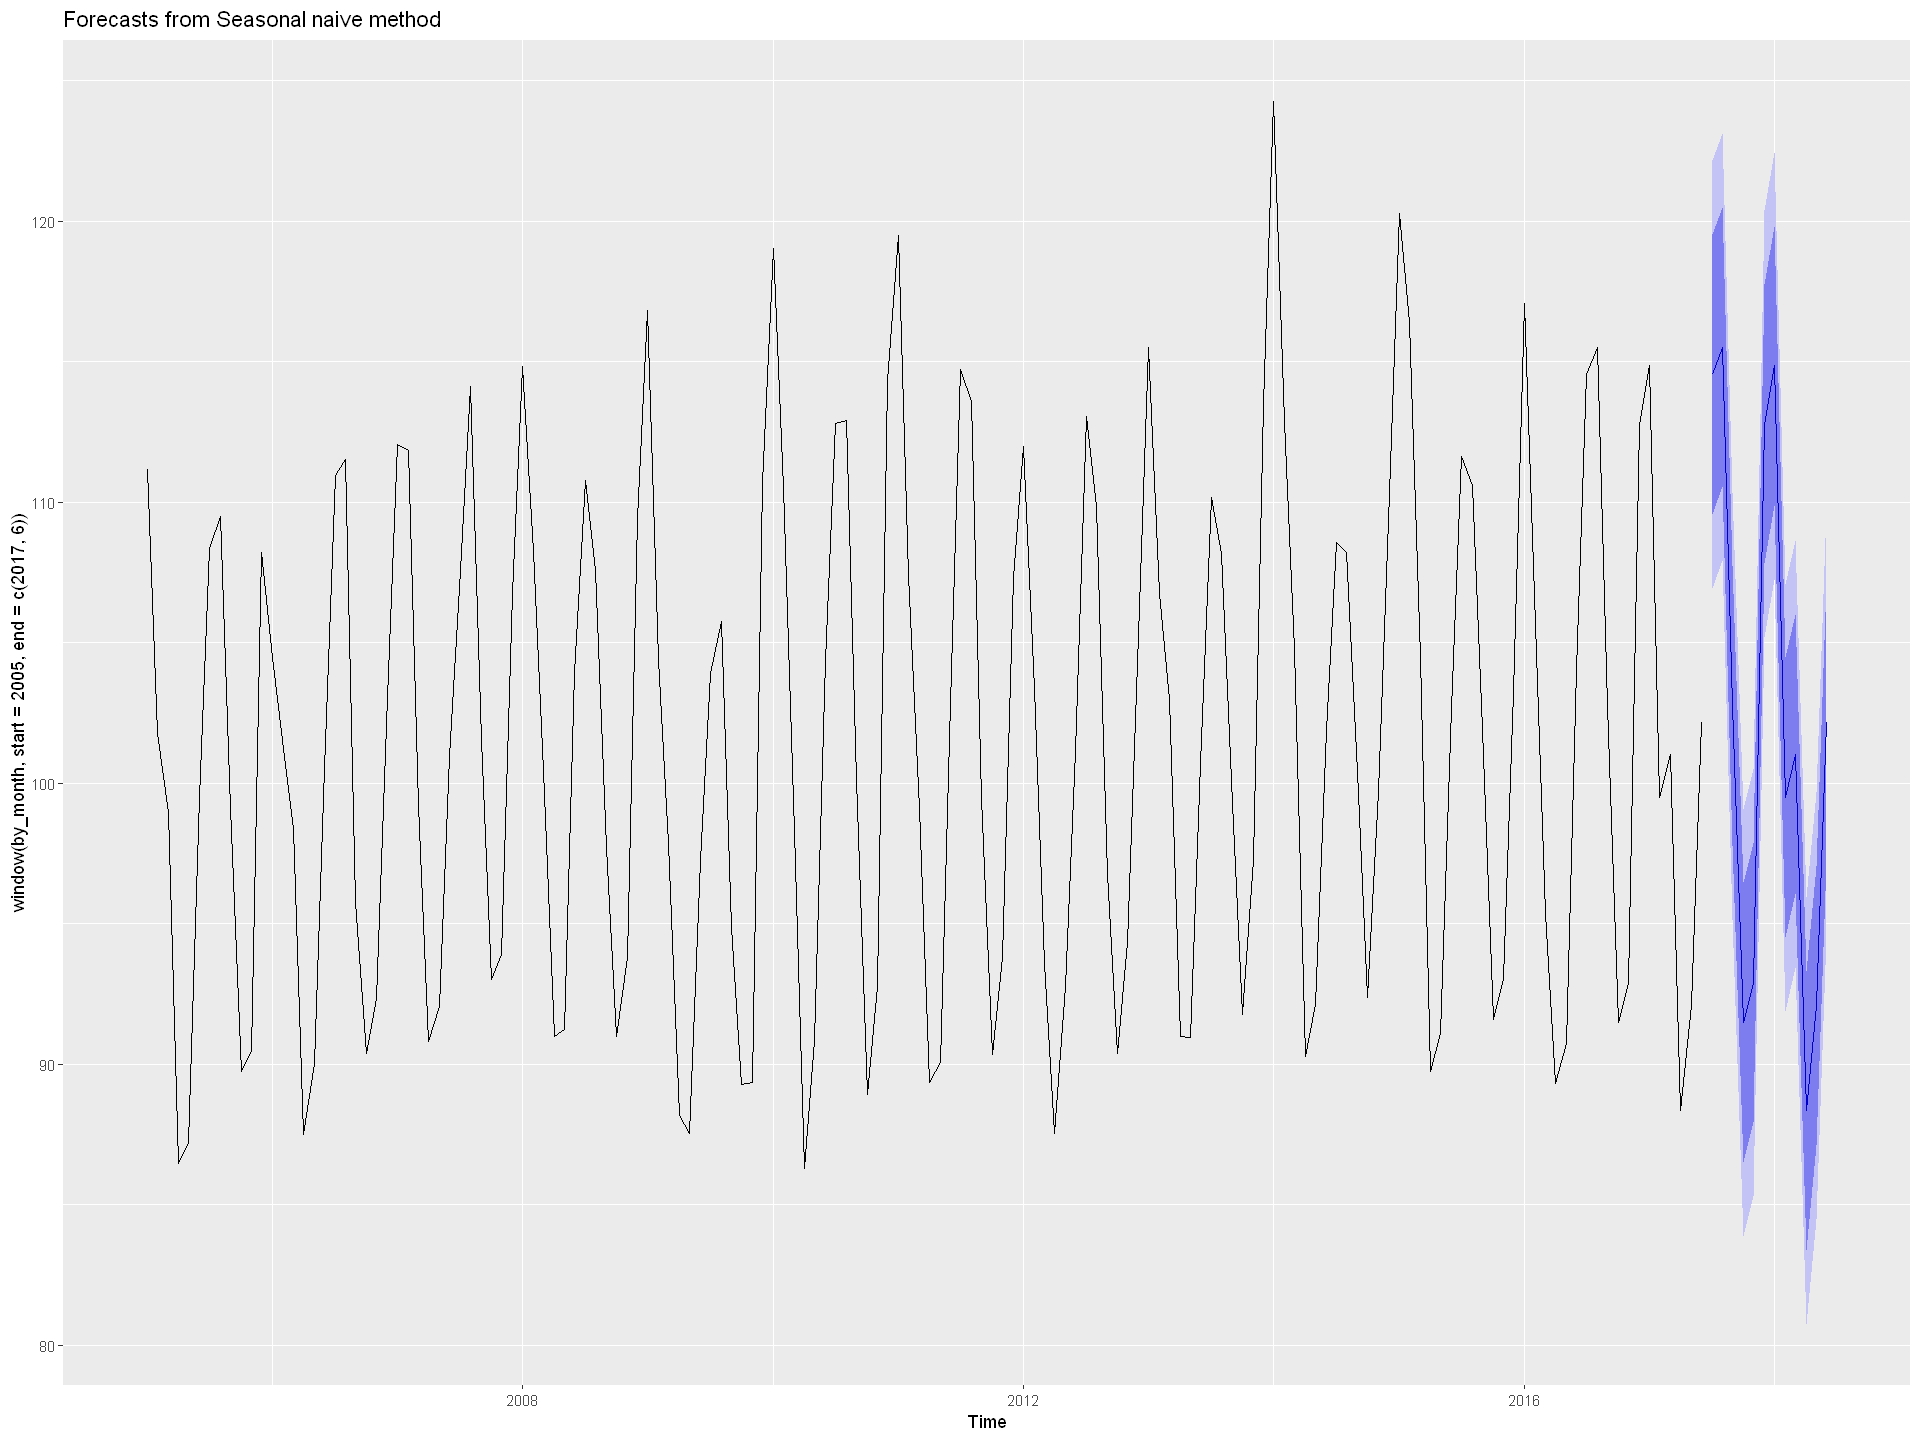

In [33]:
autoplot(snaive_fc)

 **Residual diagnostics**


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 111.18, df = 24, p-value = 3.508e-13

Model df: 0.   Total lags used: 24



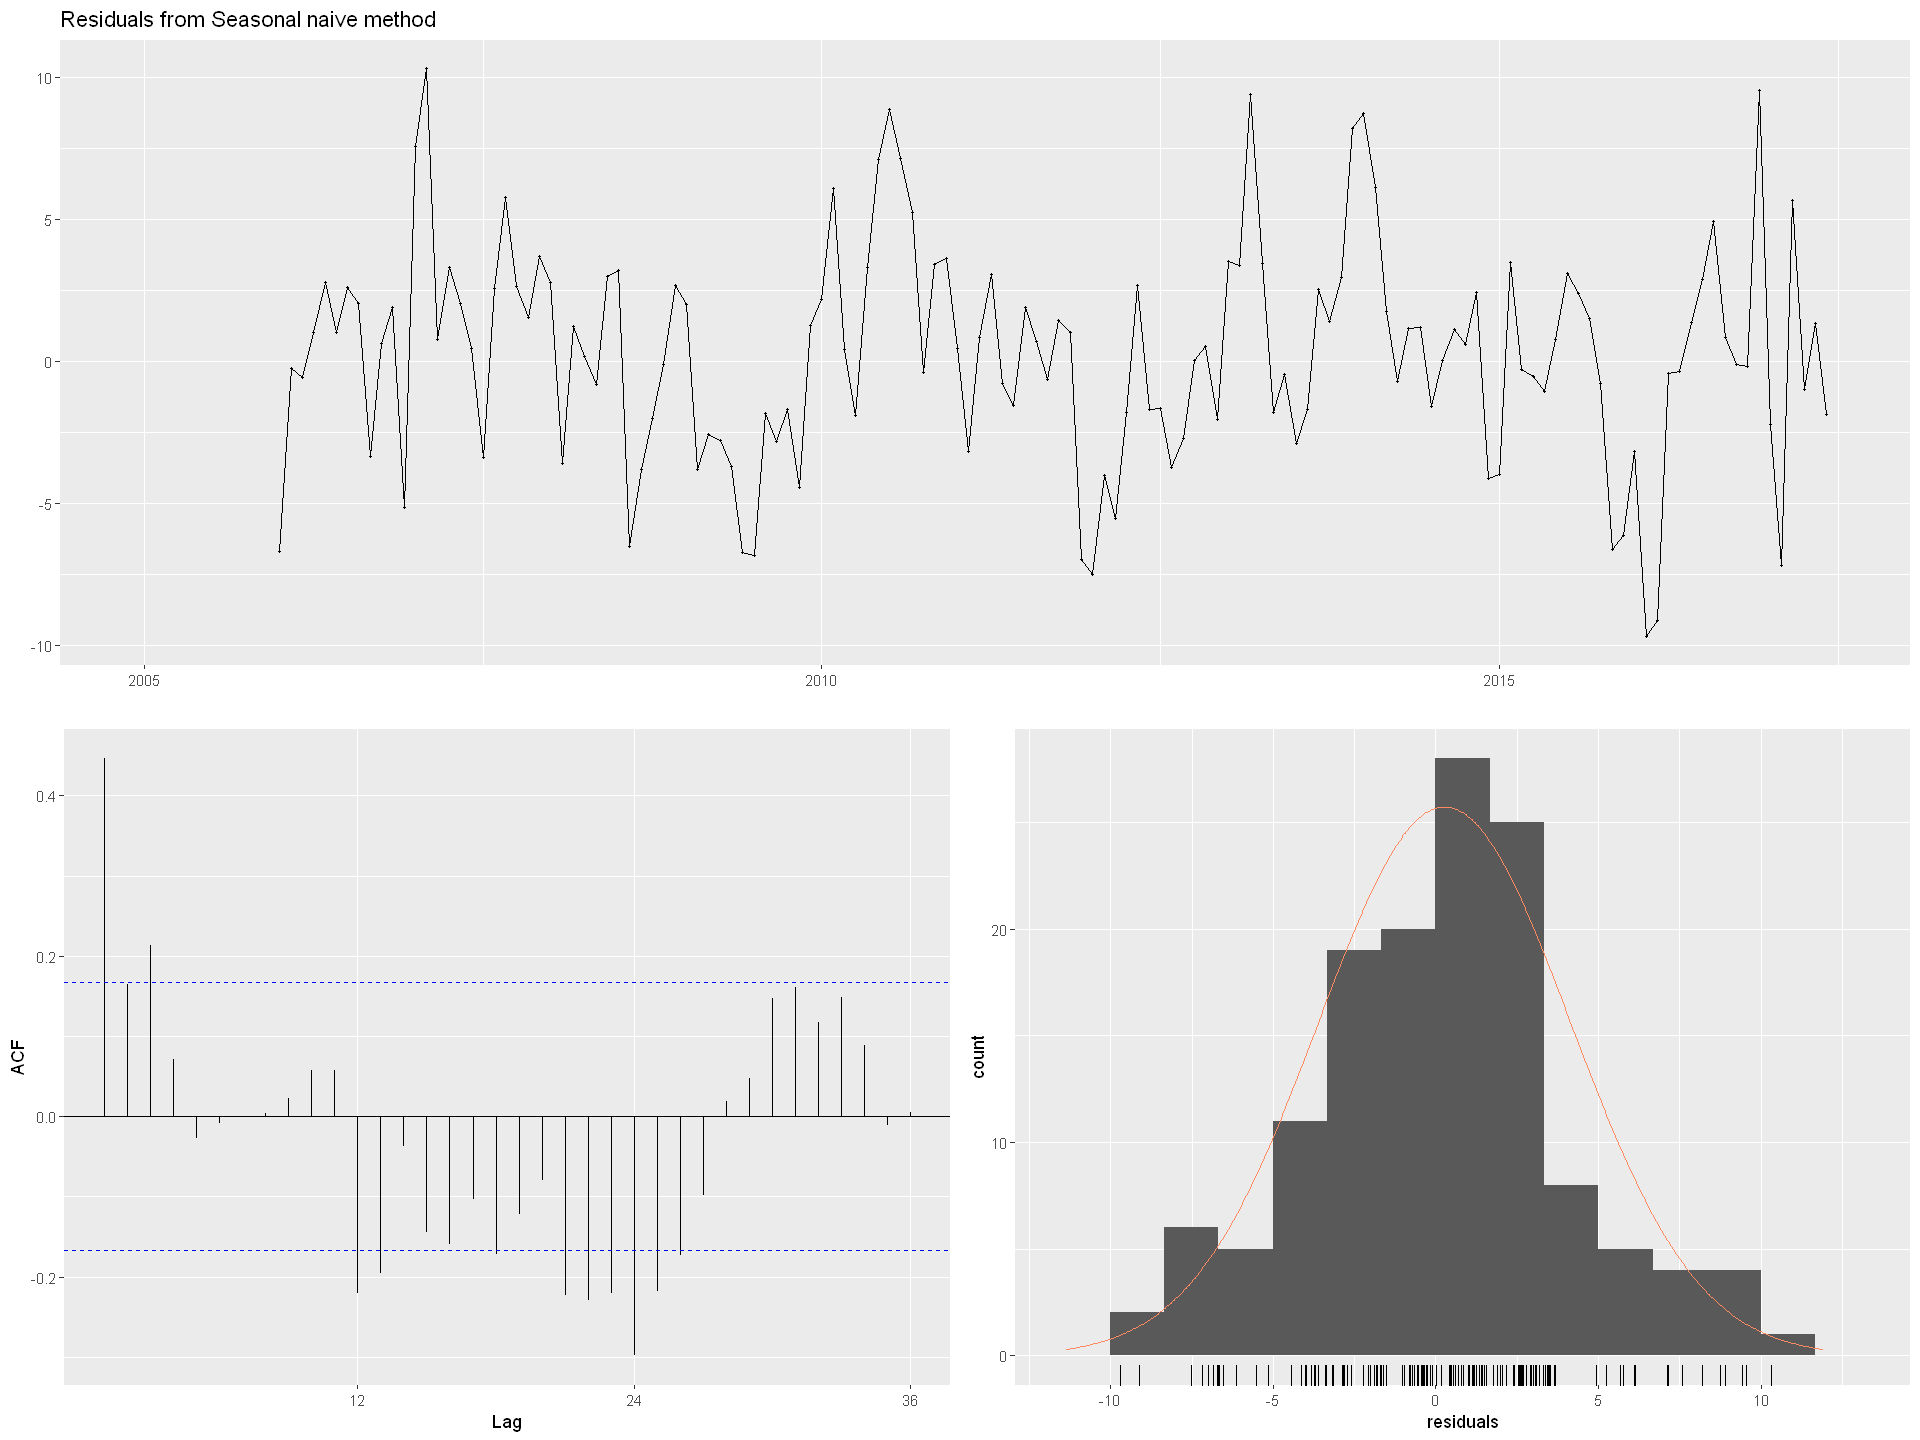

In [41]:
checkresiduals(snaive_fc)

**Accuracy**

In [34]:
accuracy(snaive_fc, window(by_month,start=2005))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.2712565,3.875924,2.991291,0.1959022,2.887371,1.000000,0.4460156,NA
Test set,1.4228714,6.613693,5.171129,1.0584893,4.595265,1.728728,0.2803315,0.6225008


**Drift Method** -> a variation of snaive which allows the forecasts to increase or decrease
over time, where the amount of change over time is set to be
the average change seen in the historical data.

In [35]:
snaive_dr_fc = snaive(window(by_month,start=2005,end=c(2017,6)), h=12, drift=TRUE)

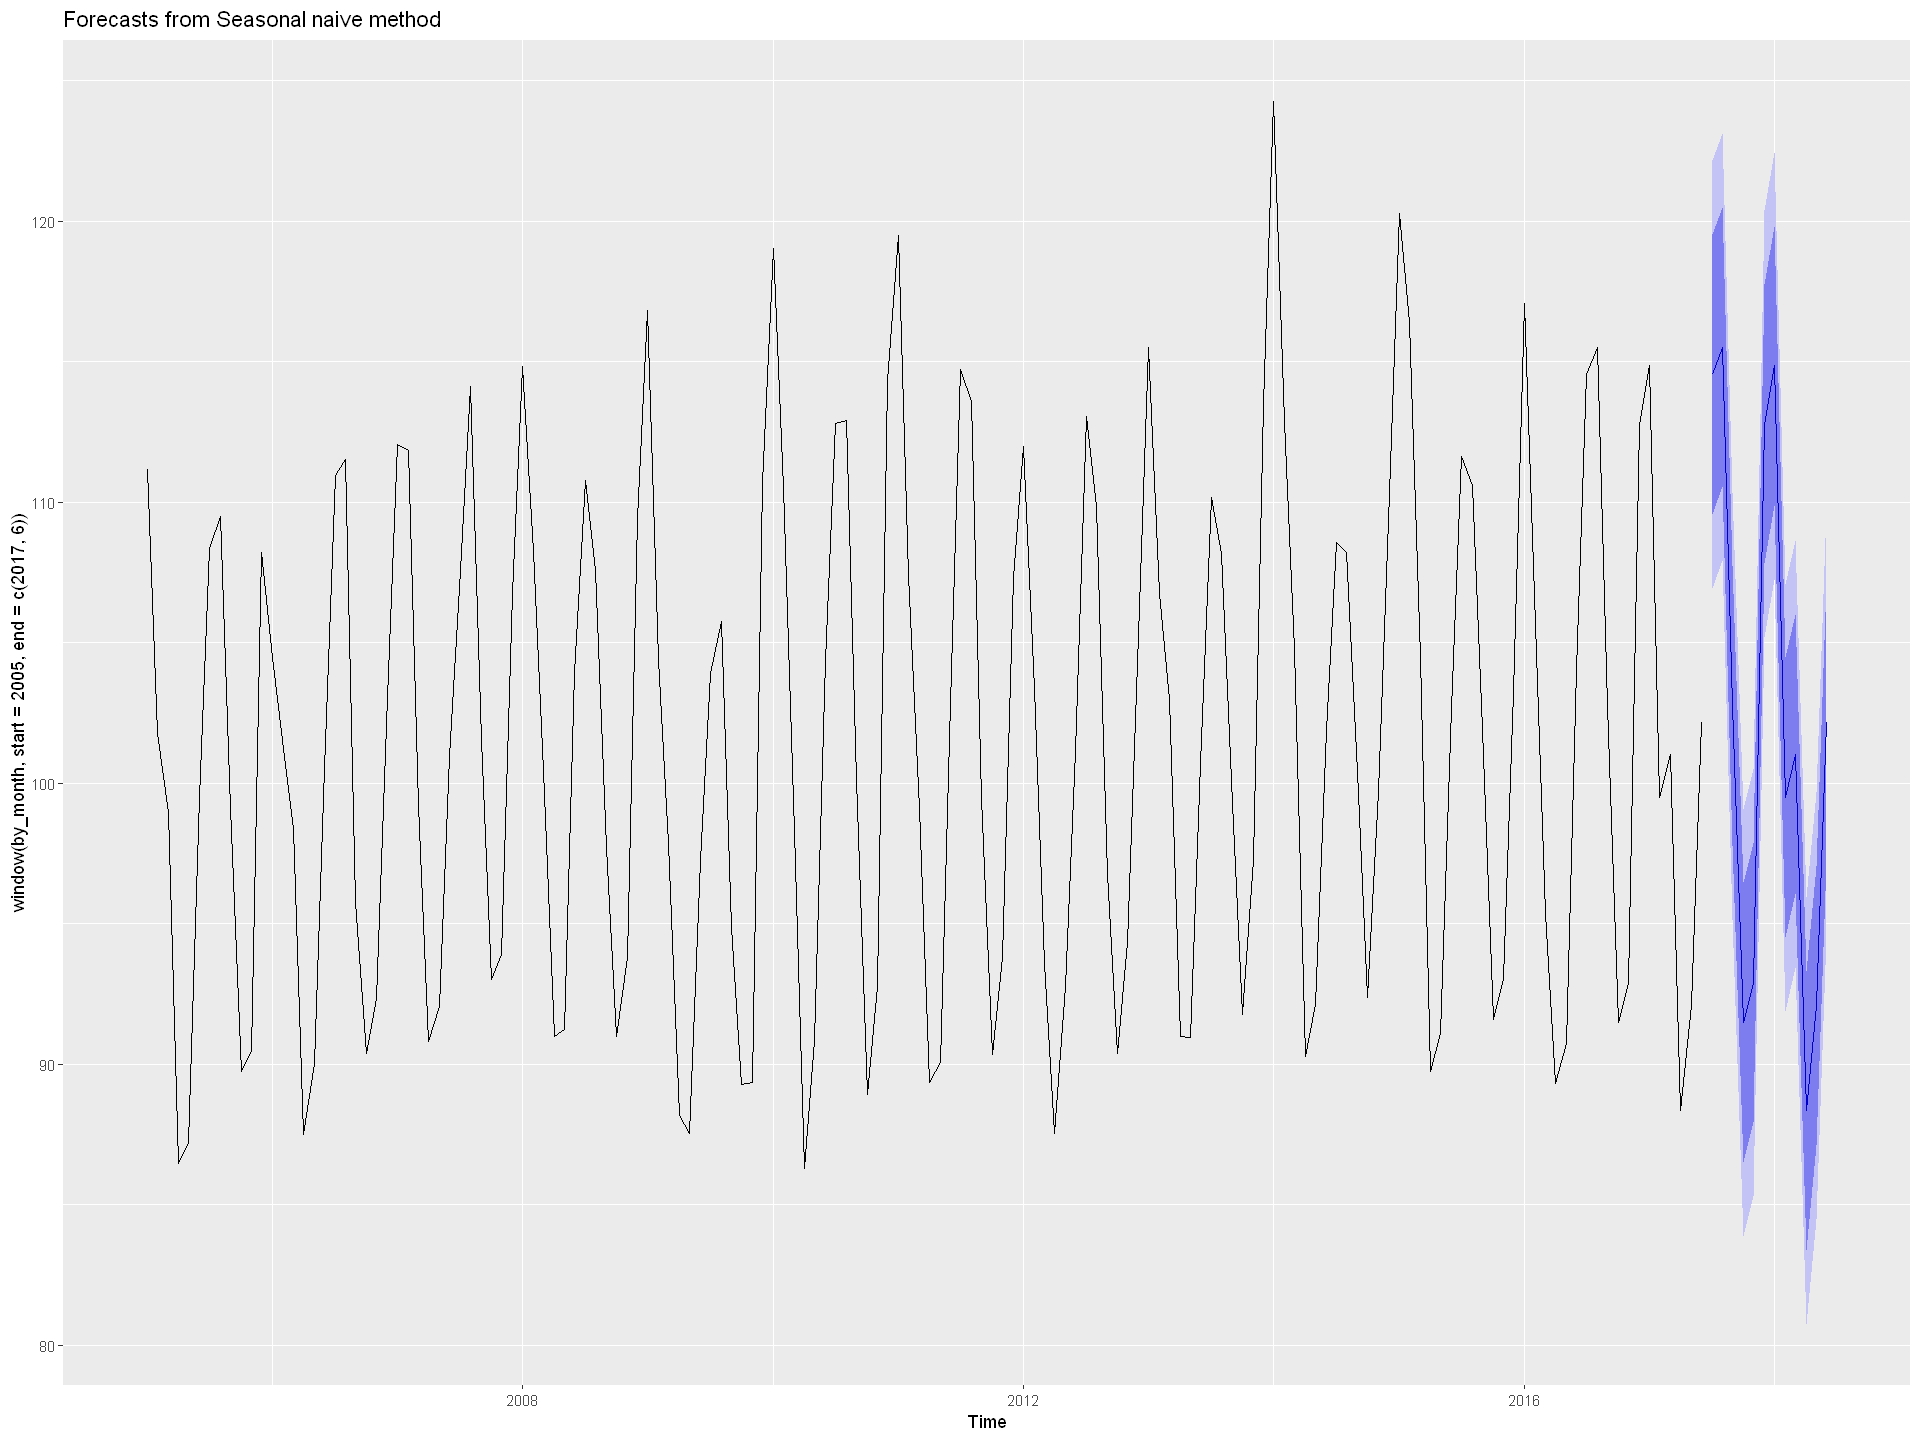

In [36]:
autoplot(snaive_dr_fc)

 **Residual diagnostics**


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 111.18, df = 24, p-value = 3.508e-13

Model df: 0.   Total lags used: 24



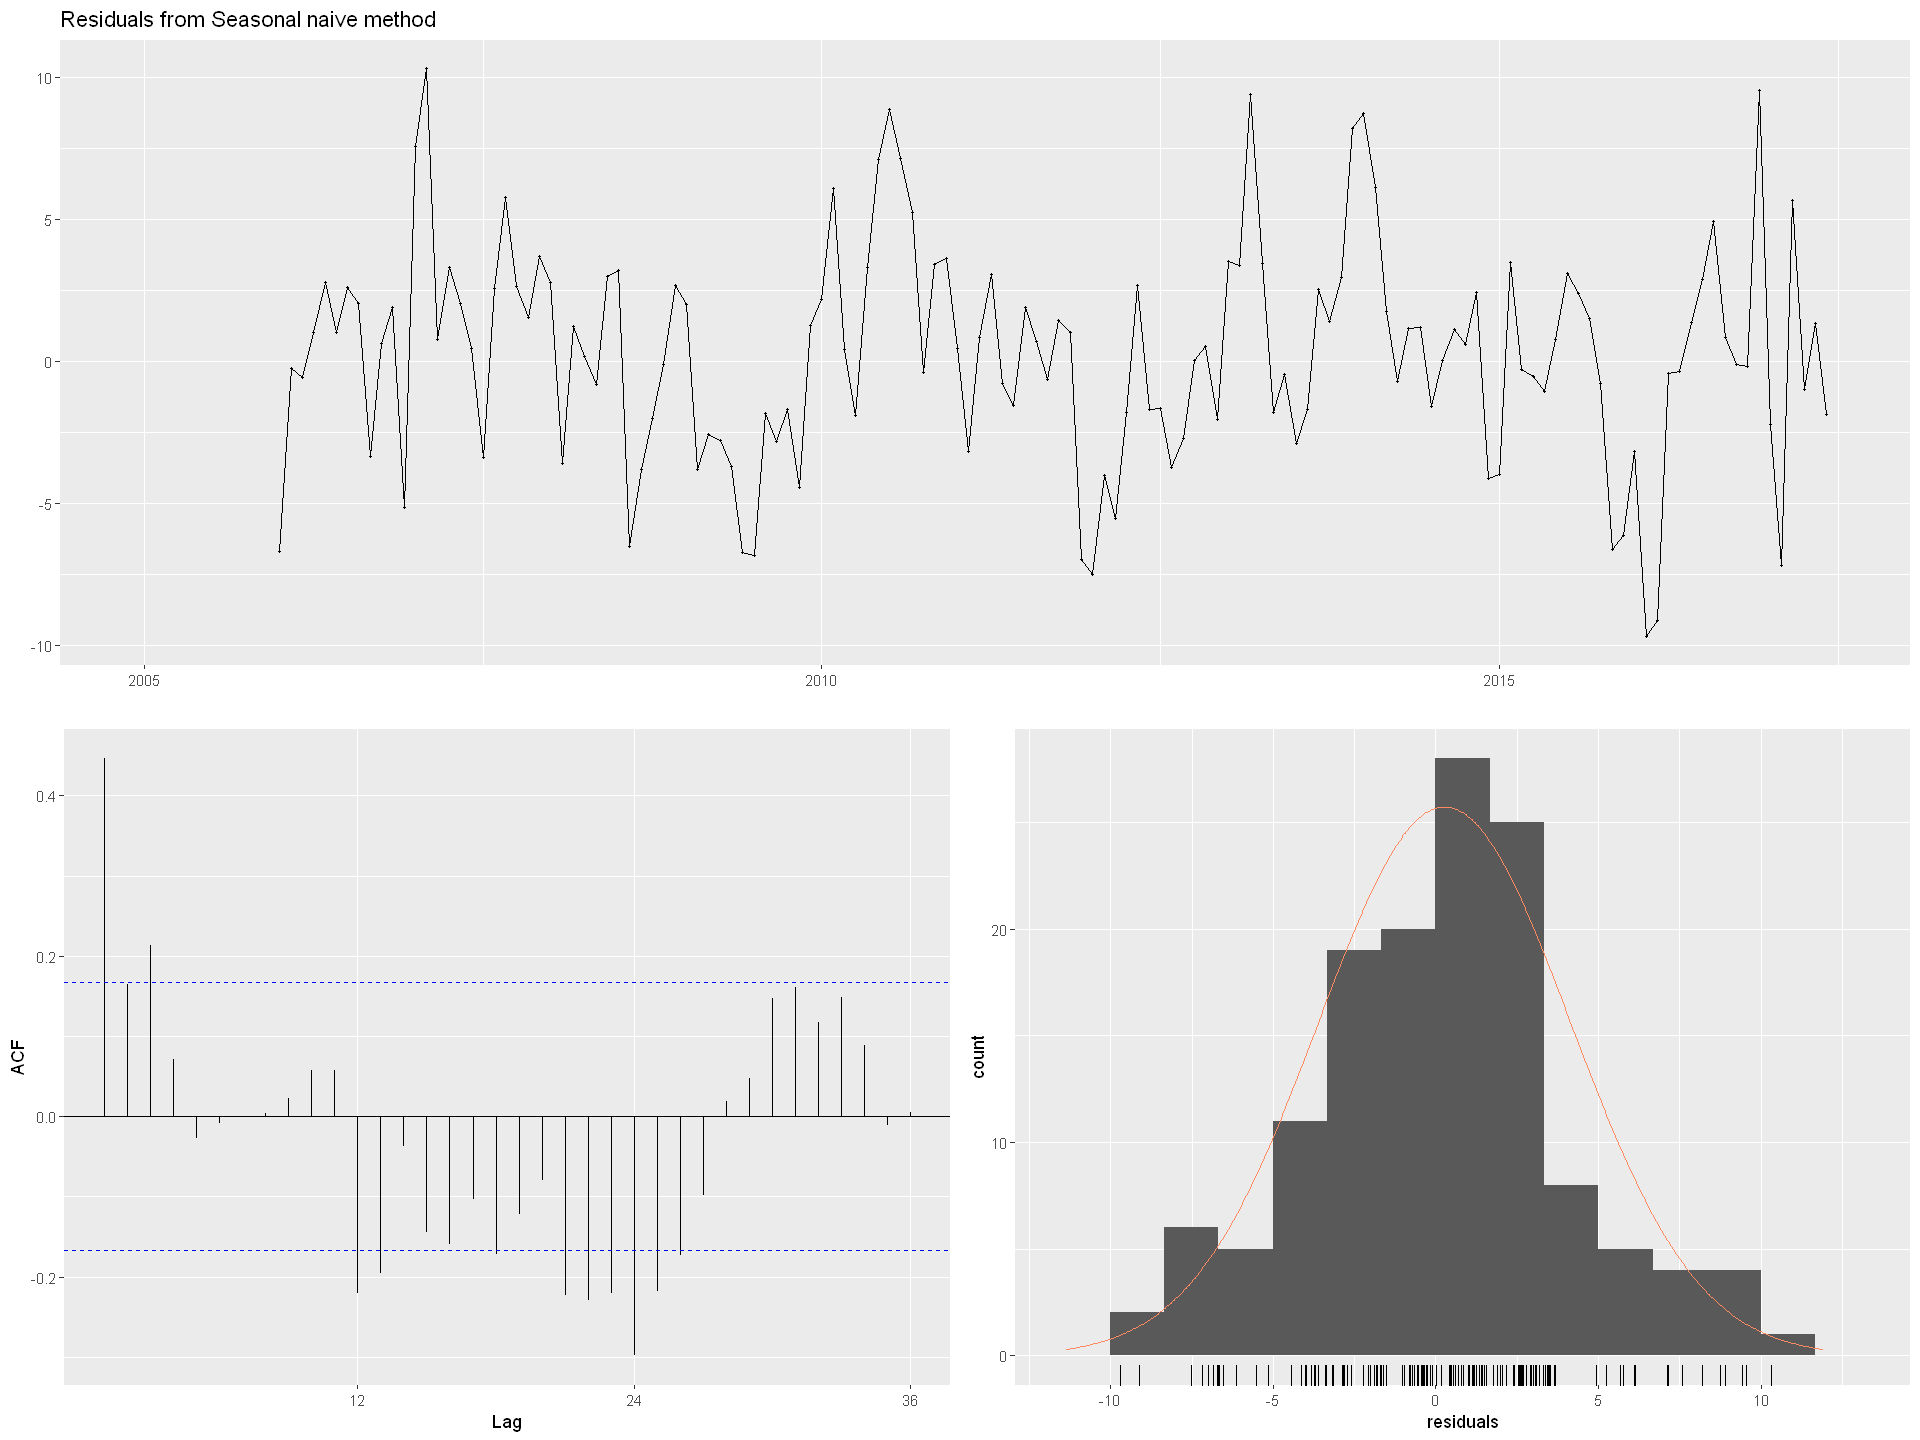

In [42]:
checkresiduals(snaive_dr_fc)

**Accuracy**

In [37]:
accuracy(snaive_dr_fc, window(by_month,start=2005))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.2712565,3.875924,2.991291,0.1959022,2.887371,1.000000,0.4460156,NA
Test set,1.4228714,6.613693,5.171129,1.0584893,4.595265,1.728728,0.2803315,0.6225008


**Cumulative plots**

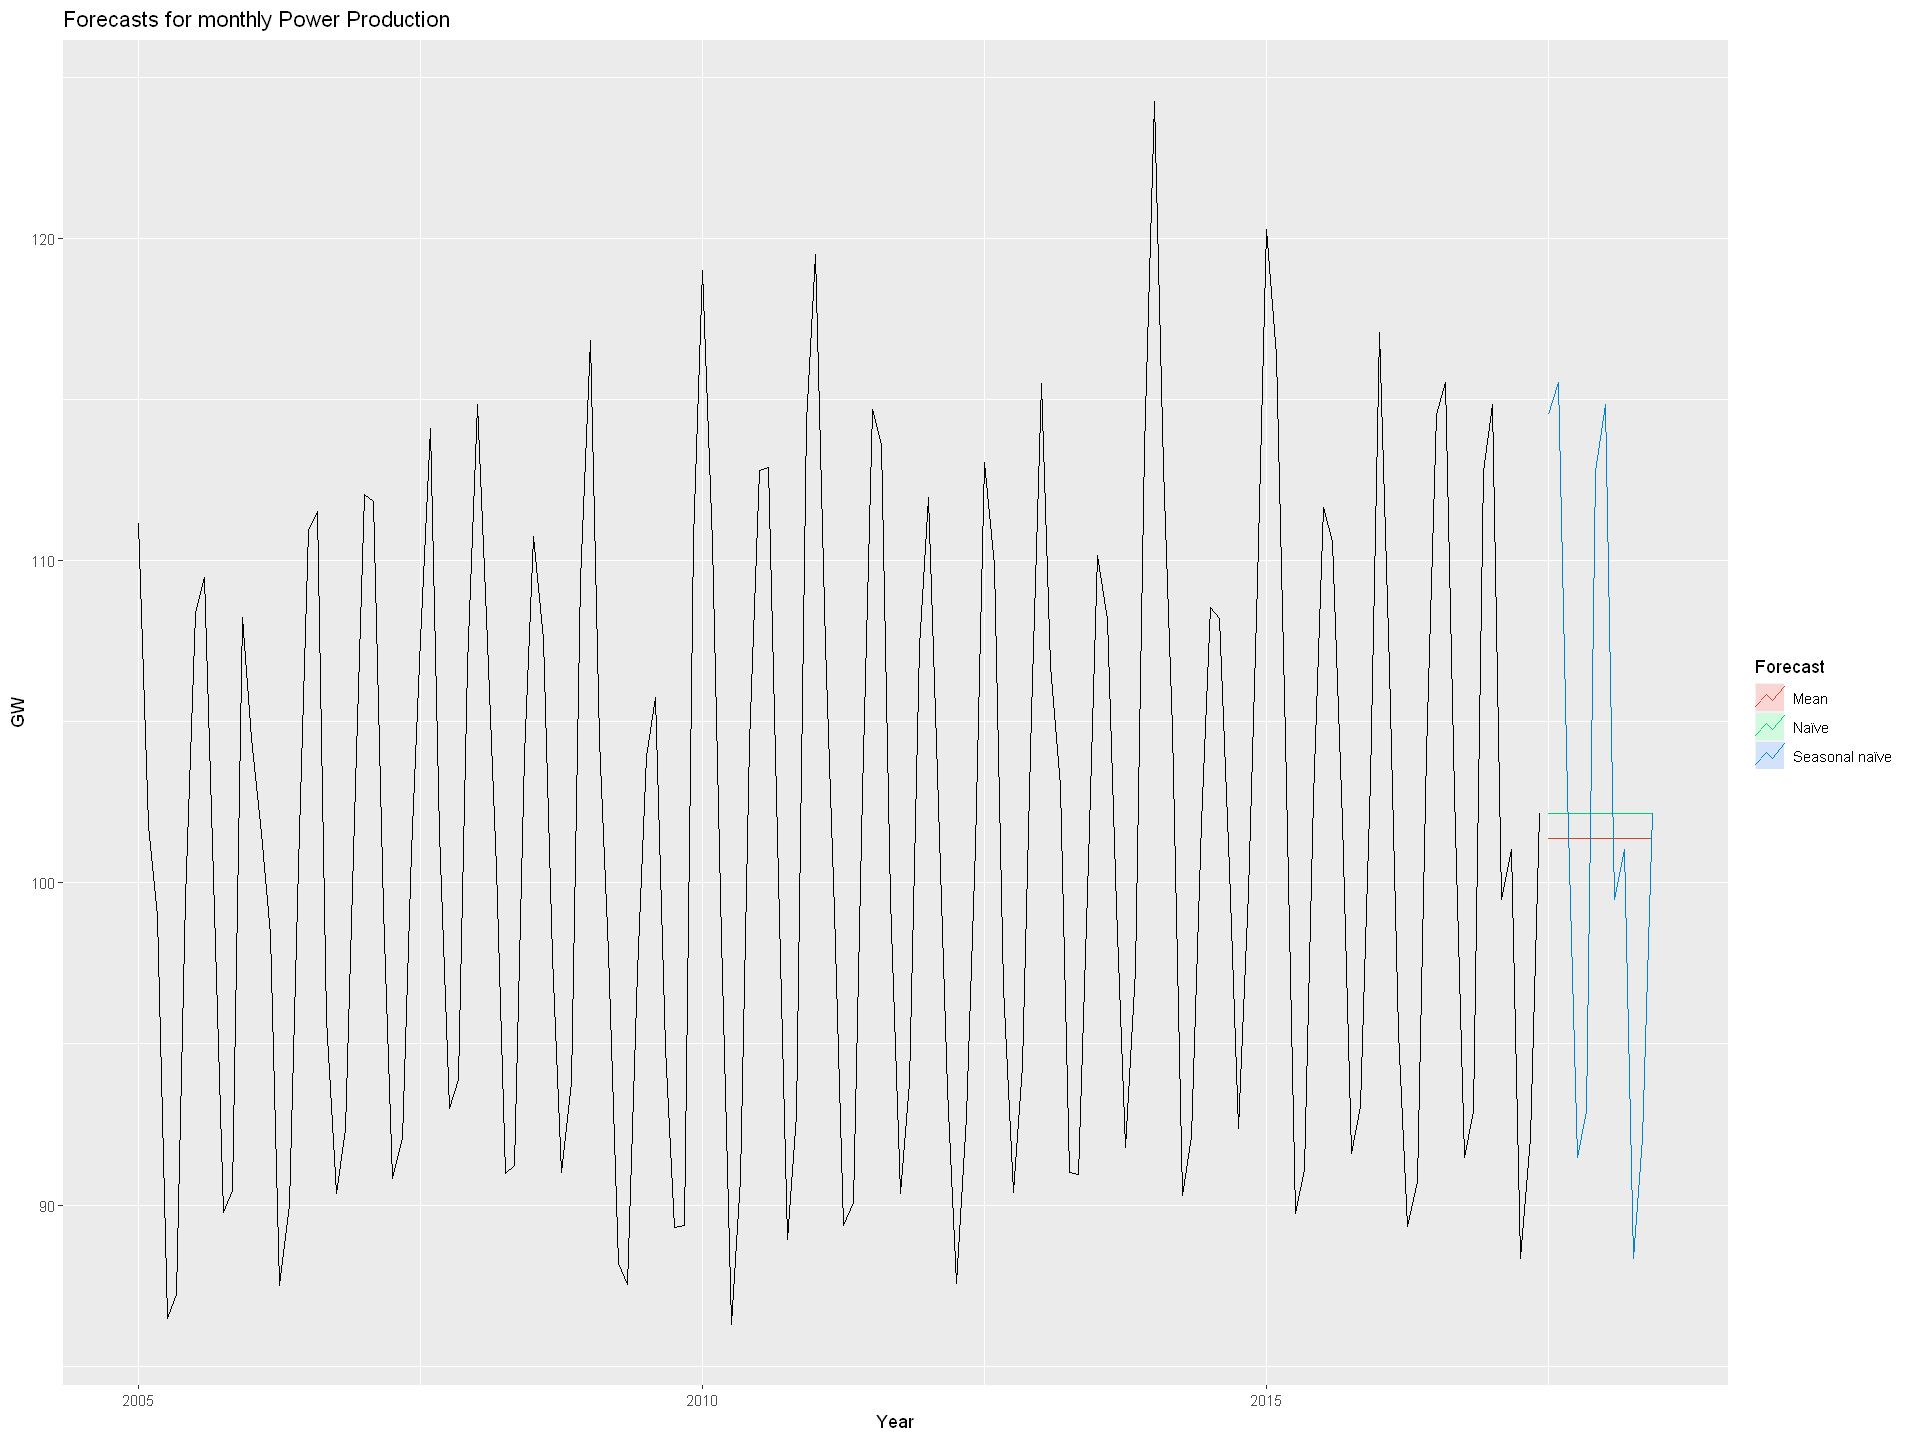

In [38]:
options(repr.plot.width = 16, repr.plot.height = 12)
autoplot(window(by_month,start=2005,end=c(2017,6))) +
autolayer(mean_fc, series="Mean", PI=FALSE) +
autolayer(naive_fc, series="Naïve", PI=FALSE) +
autolayer(snaive_fc, series="Seasonal naïve", PI=FALSE) +
xlab("Year") + ylab("GW") +
ggtitle("Forecasts for monthly Power Production") +
guides(colour=guide_legend(title="Forecast"))

**Box-Cox transformation**

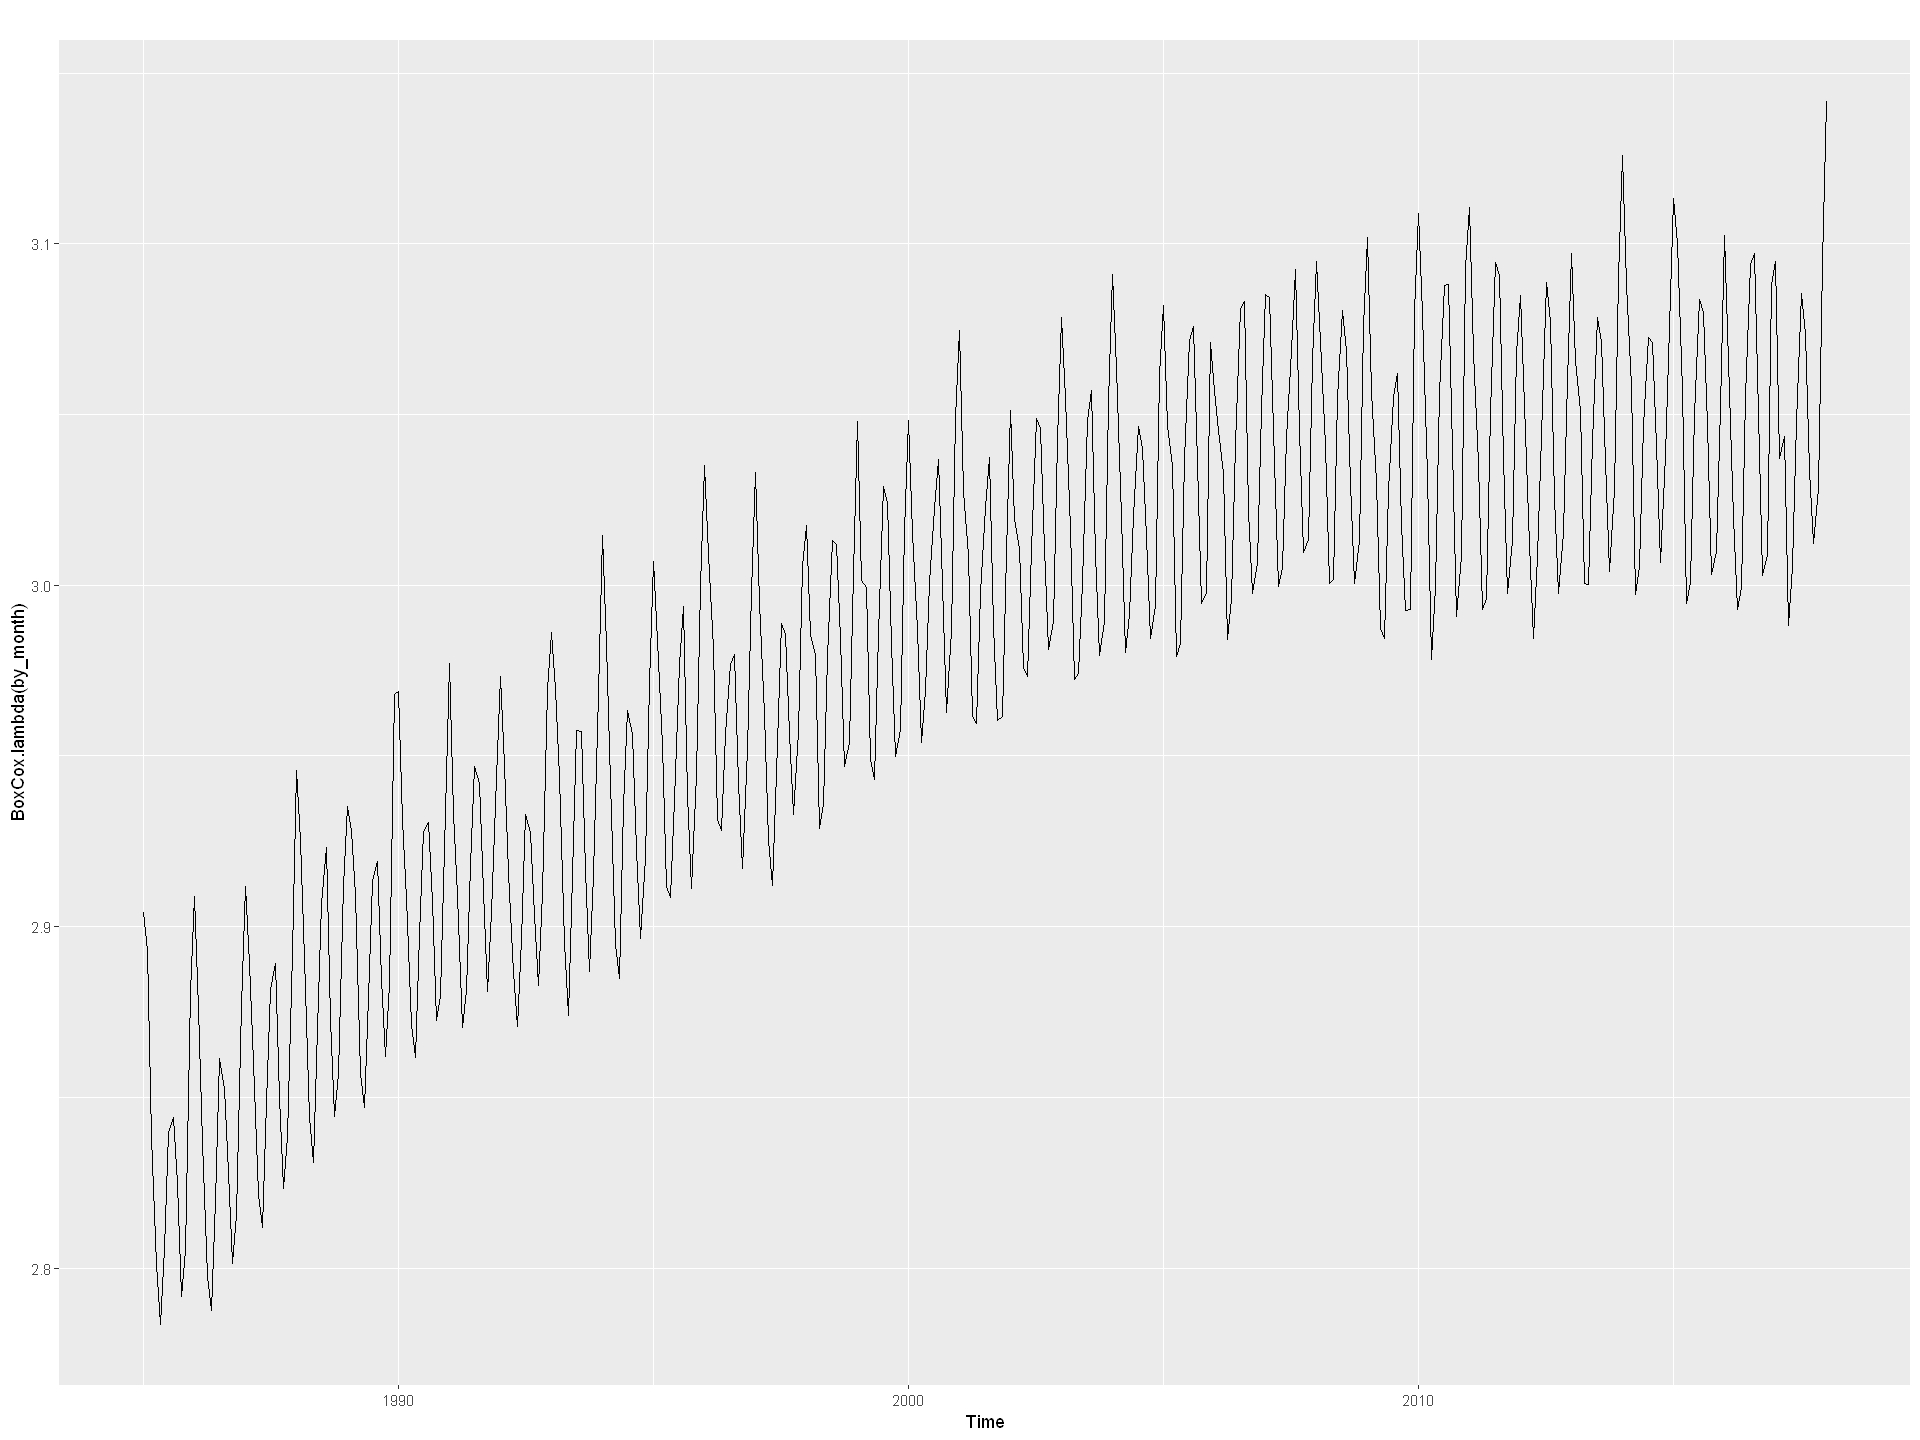

In [39]:
autoplot(BoxCox(by_month,BoxCox.lambda(by_month))) +  ylab("BoxCox.lambda(by_month)")

# ARIMA Models

In [47]:
fit_arima = auto.arima(by_month)


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)(0,1,1)[12]
Q* = 43.986, df = 20, p-value = 0.001511

Model df: 4.   Total lags used: 24



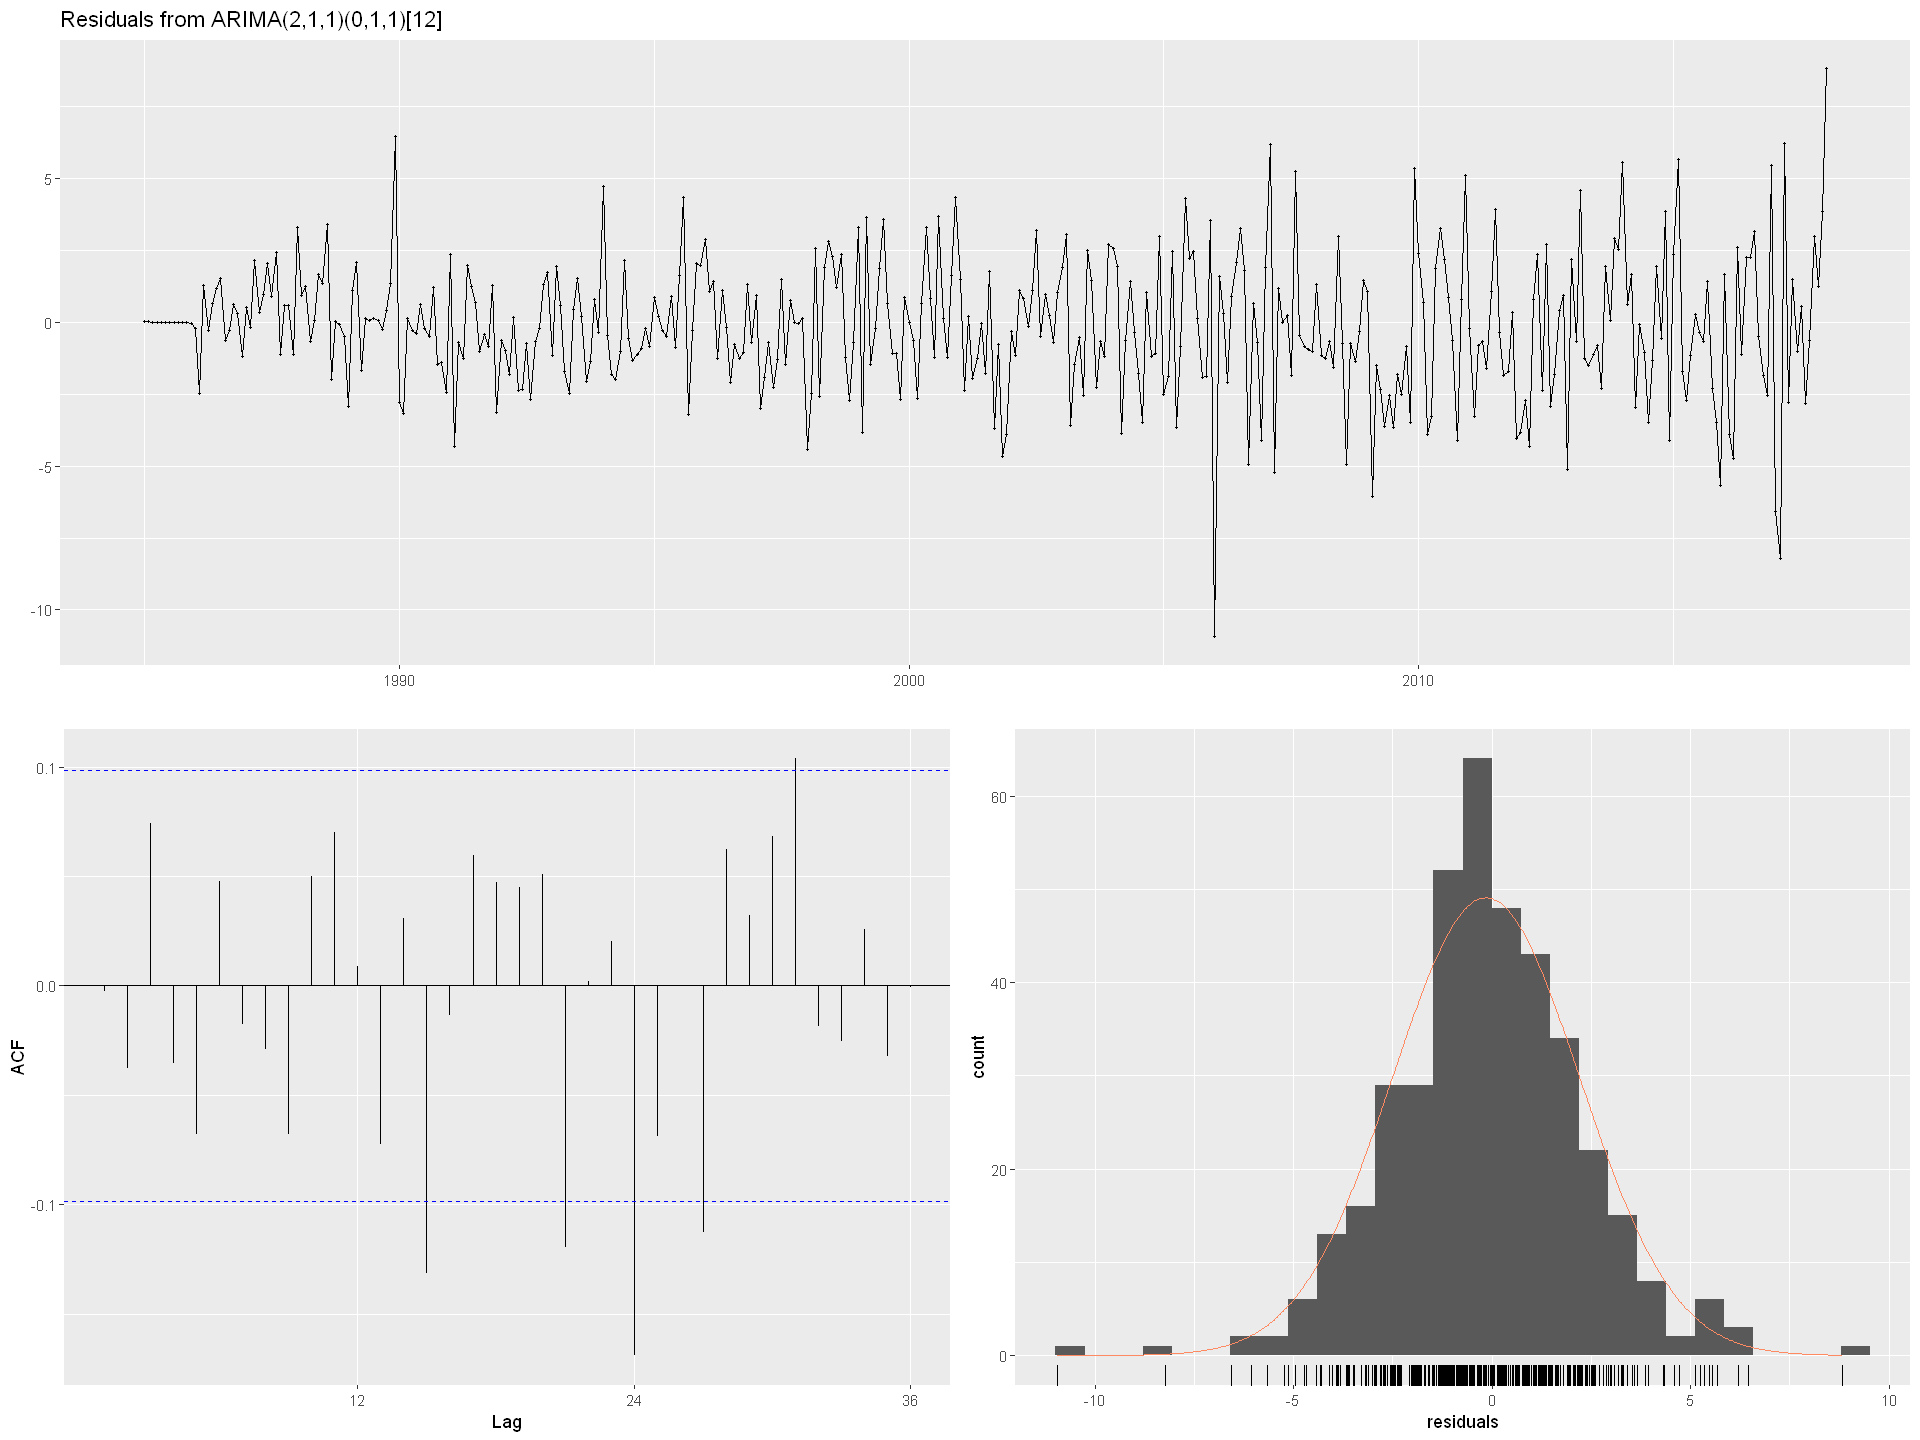

In [48]:
checkresiduals(fit_arima)

In [49]:
summary(fit_arima)

Series: by_month 
ARIMA(2,1,1)(0,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     sma1
      0.5503  -0.0683  -0.9477  -0.7635
s.e.  0.0544   0.0549   0.0193   0.0331

sigma^2 estimated as 5.838:  log likelihood=-888.05
AIC=1786.11   AICc=1786.27   BIC=1805.86

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.1474299 2.363849 1.791855 -0.2115265 1.942956 0.6278541
                     ACF1
Training set -0.002715831


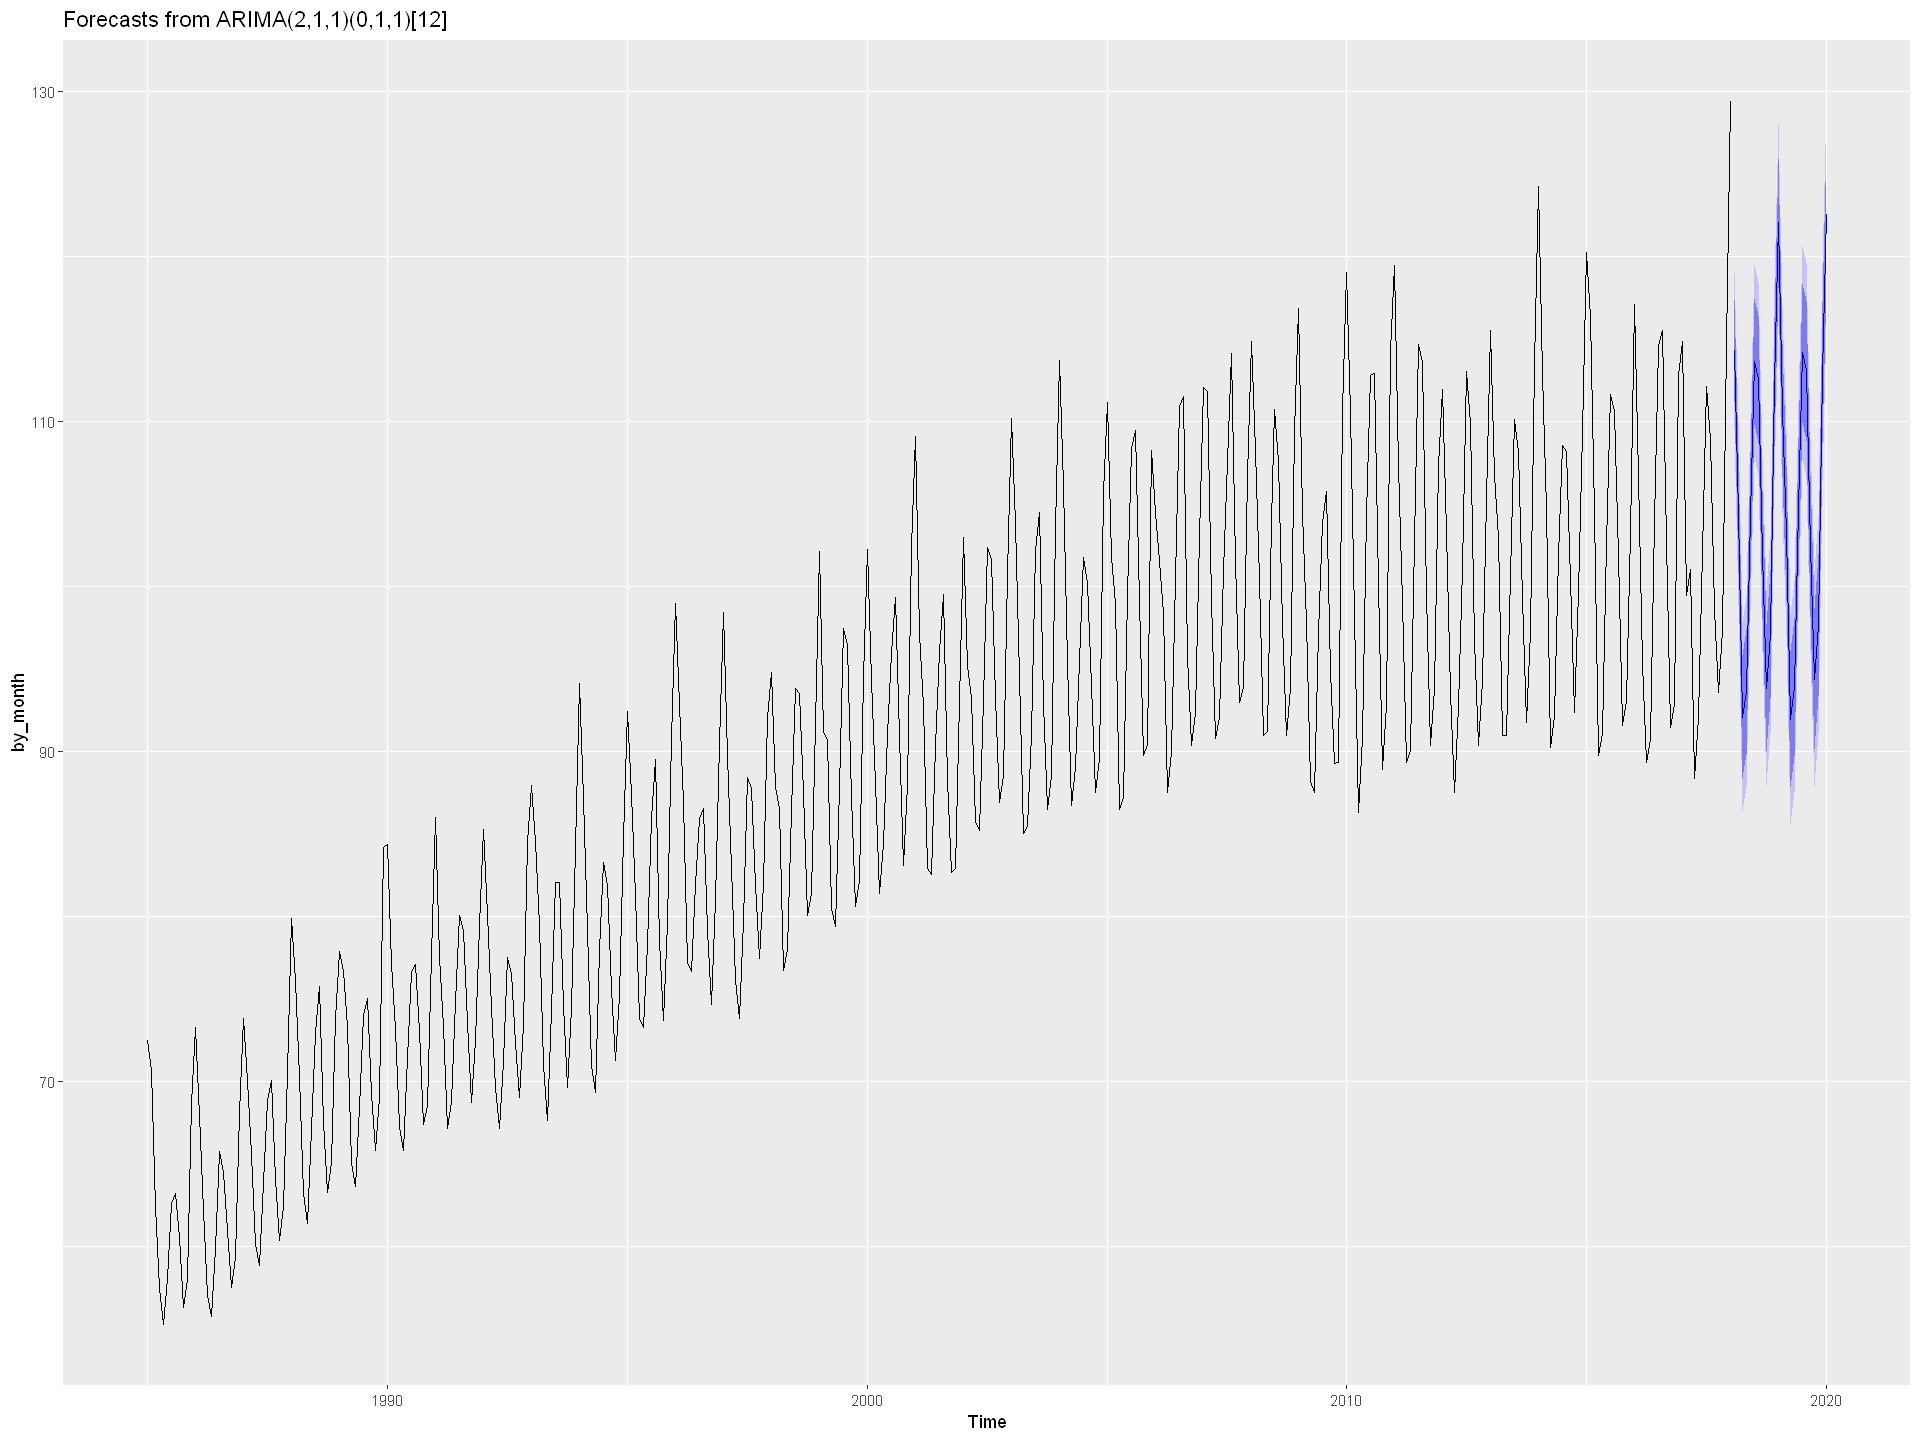

In [50]:
fit_arima %>% forecast() %>% autoplot()

# Holt-Winters

In [51]:
train = subset(by_month, end = length(by_month) - 8)

In [52]:
fchw_train = hw(train, seasonal = "multiplicative", h = 8)

In [53]:
accuracy(fchw_train, by_month)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0544117,2.418720,1.862298,-0.1237325,2.085967,0.6619193,0.09041083,NA
Test set,3.8524650,5.594696,3.852465,3.3871615,3.387162,1.3692871,0.35901369,0.5448356



	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 85.632, df = 8, p-value = 3.553e-15

Model df: 16.   Total lags used: 24



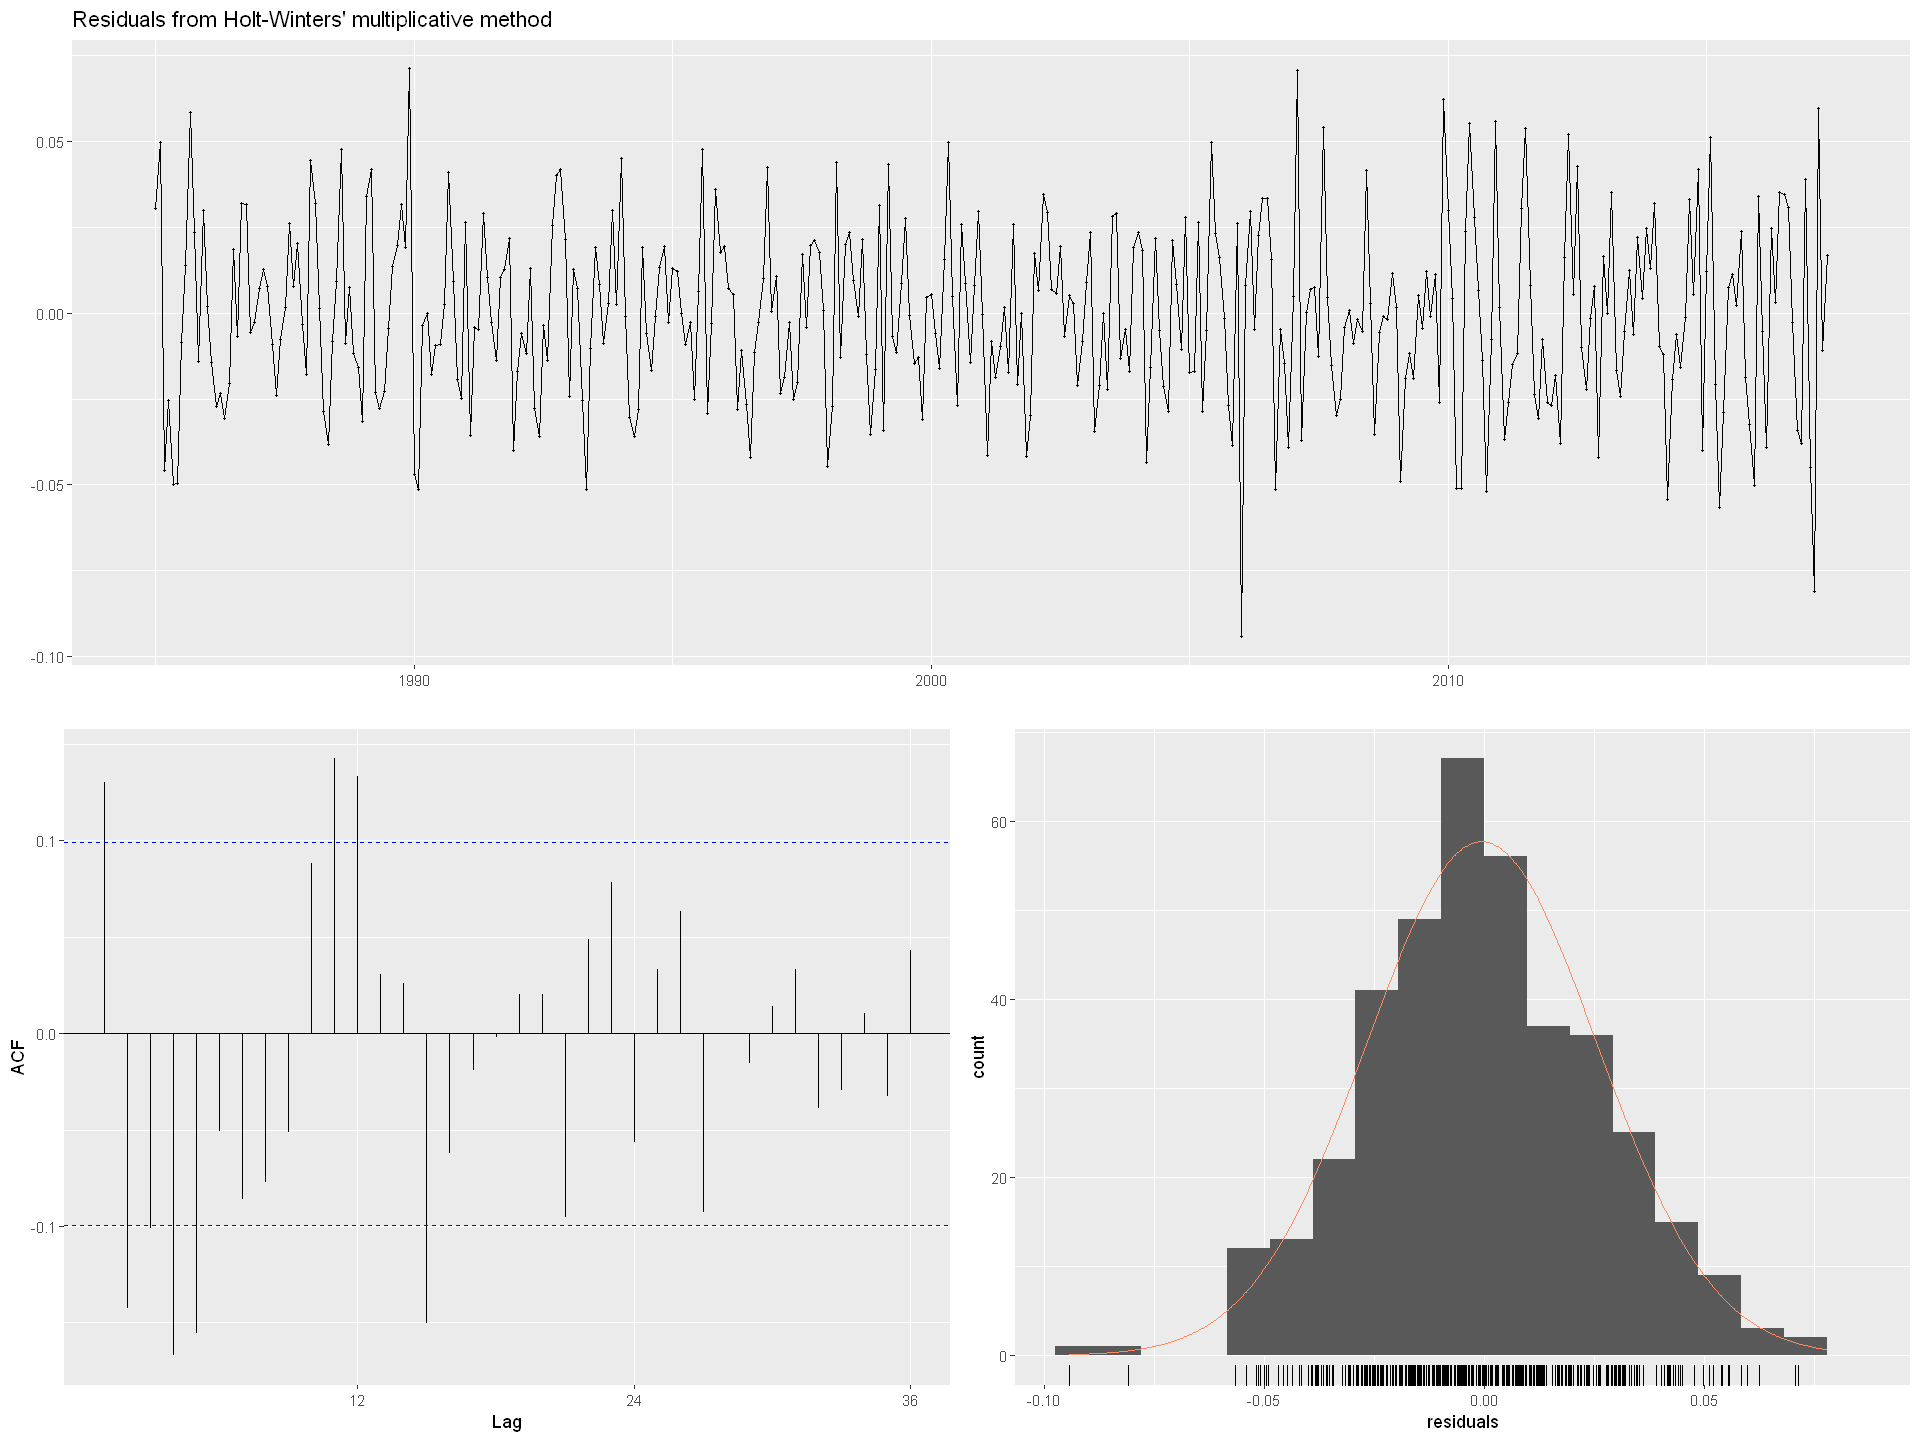

In [54]:
checkresiduals(fchw_train)

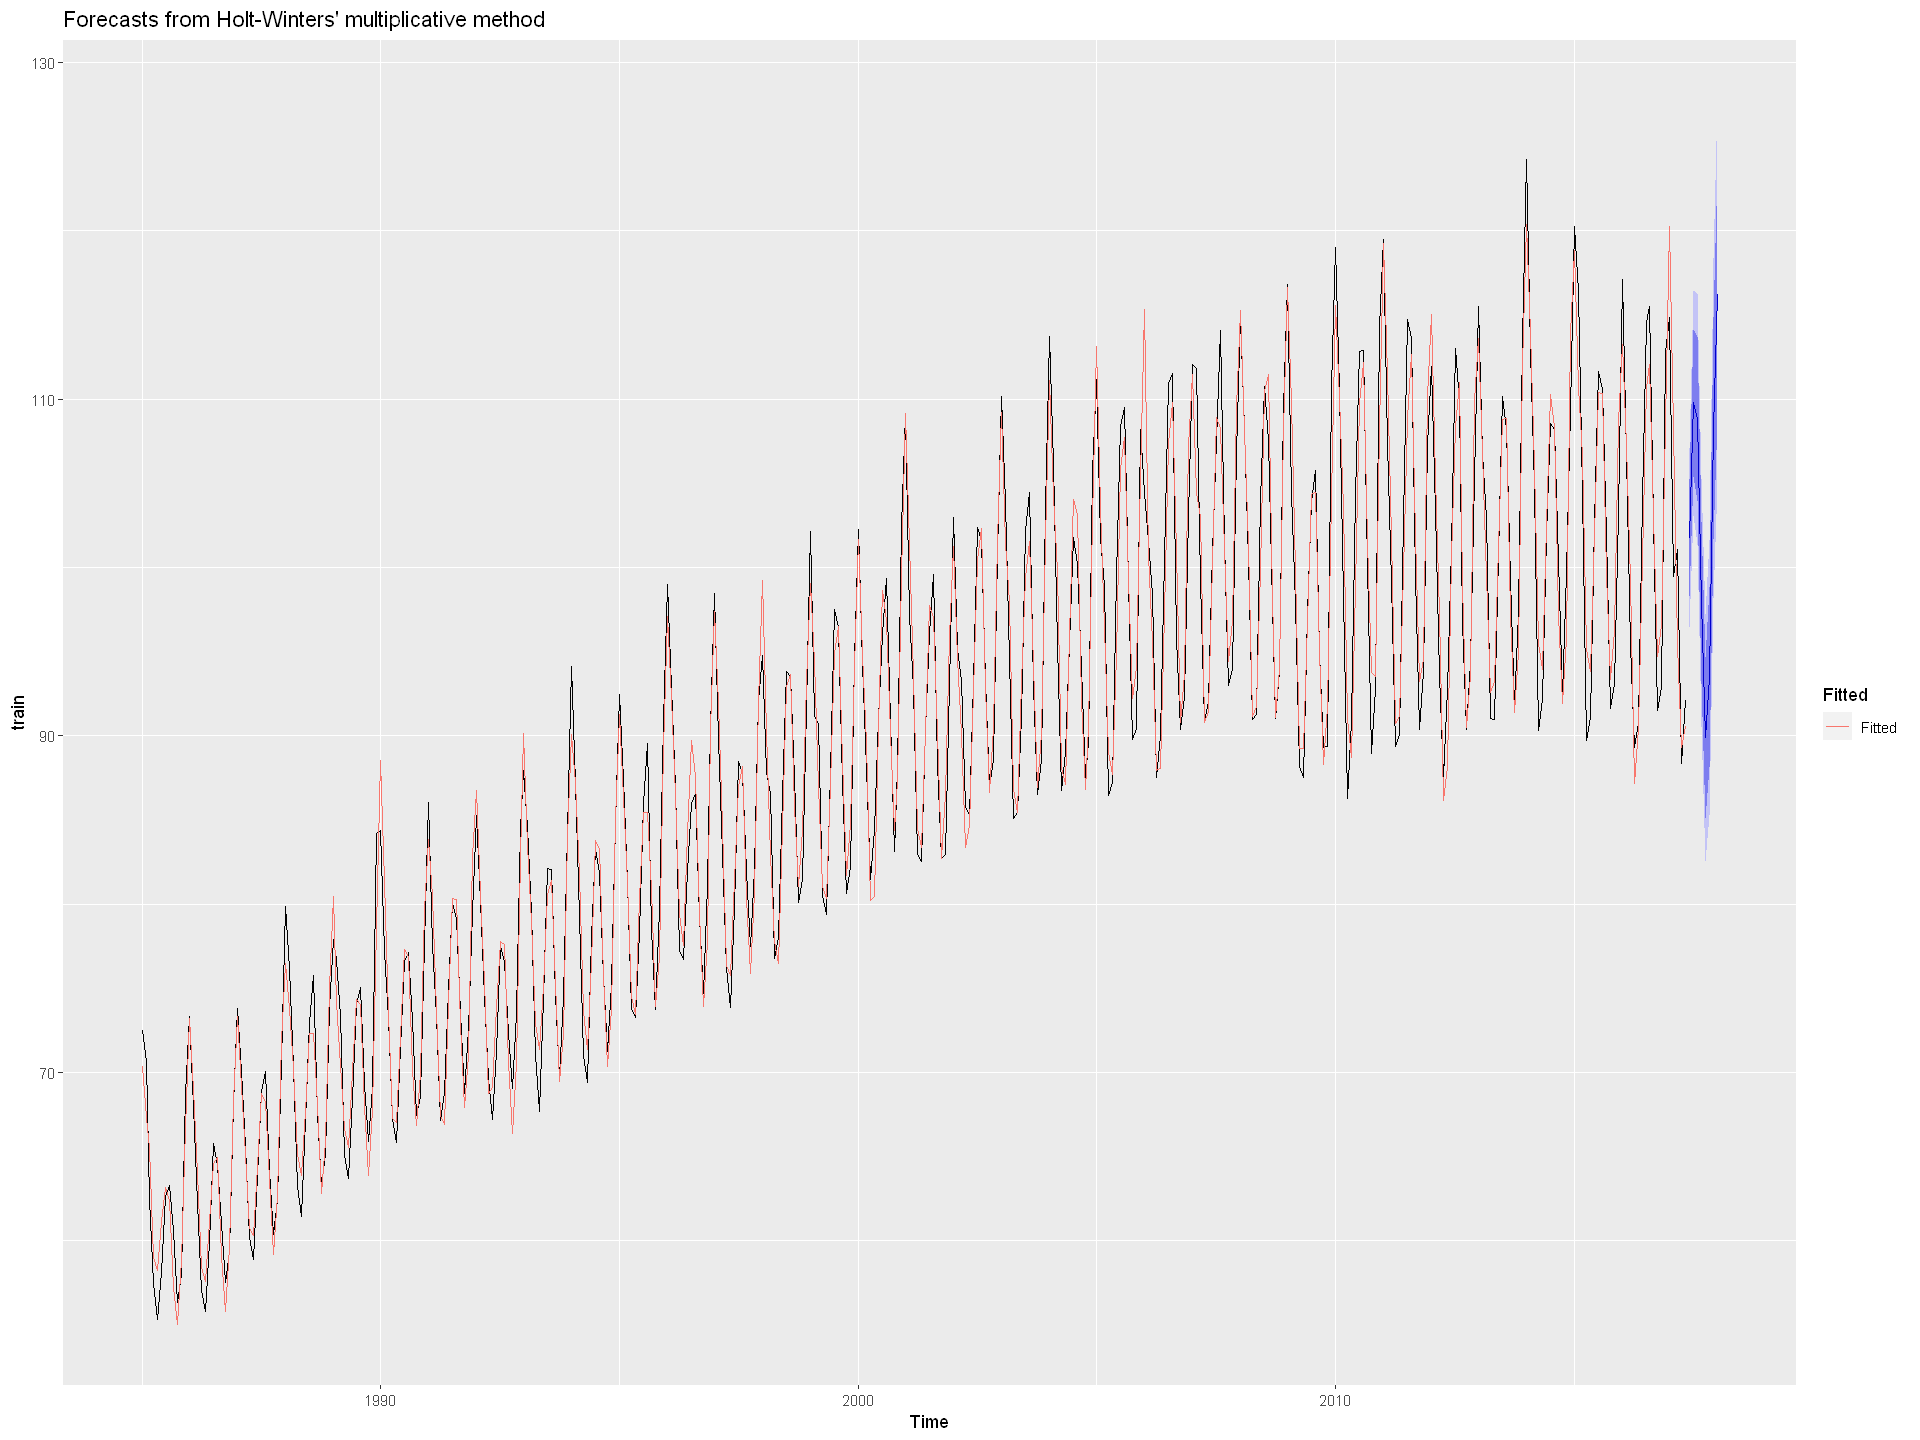

In [56]:
autoplot(fchw_train) + autolayer(fitted(fchw_train), series='Fitted') + 
  guides(colour=guide_legend(title="Fitted"), fill=guide_legend(title="Prediction interval"))